# Inverted Sentiment Scores dont change shit

# Invert predictions

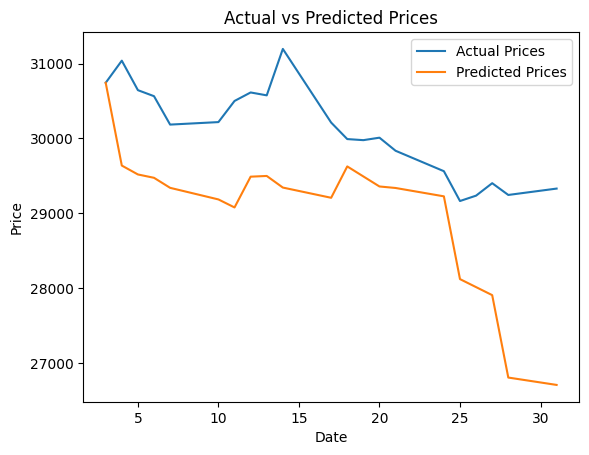

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load data
june_prices = pd.read_csv('june_data.csv', parse_dates=['Date'], index_col='Date')
july_prices = pd.read_csv('july_data.csv', parse_dates=['Date'], index_col='Date')
june_sentiment = pd.read_csv('classification_results_train.csv')
july_sentiment = pd.read_csv('classification_results.csv')

# Process data
june_prices['Day'] = june_prices.index.day
july_prices['Day'] = july_prices.index.day

# Merge sentiment scores with price data
june_data = pd.merge(june_prices, june_sentiment, on='Day')
july_data = pd.merge(july_prices, july_sentiment, on='Day')

# Compute daily average prices and sentiment scores
june_daily_data = june_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})
july_daily_data = july_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})

# Compute daily price changes for training
june_daily_data['Price Change'] = june_daily_data['Value2'].diff().fillna(0)

# Prepare data for training
X_train = june_daily_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = june_daily_data['Price Change'].values

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize an empty list to store predicted prices
predicted_prices = []

# Get the starting price from the first day of July
starting_price = july_daily_data['Value2'].iloc[0]

# Append the starting price to the list of predicted prices
predicted_prices.append(starting_price)

# Predict price changes for each day in July and update the predicted price
for i in range(len(july_daily_data)):
    sentiment_score = july_daily_data['Average Sentiment Score'].iloc[i].reshape(1, -1)
    price_change = model.predict(sentiment_score)[0] * -1  # Inverting the predictions
    predicted_price = predicted_prices[-1] + price_change
    predicted_prices.append(predicted_price)

# Remove the last predicted price as it goes beyond the last day of July
predicted_prices.pop()

# Plot the actual and predicted prices
plt.plot(july_daily_data.index, july_daily_data['Value2'], label='Actual Prices')
plt.plot(july_daily_data.index, predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


# Random forest regressor 2022 Full data test average sentiment scores

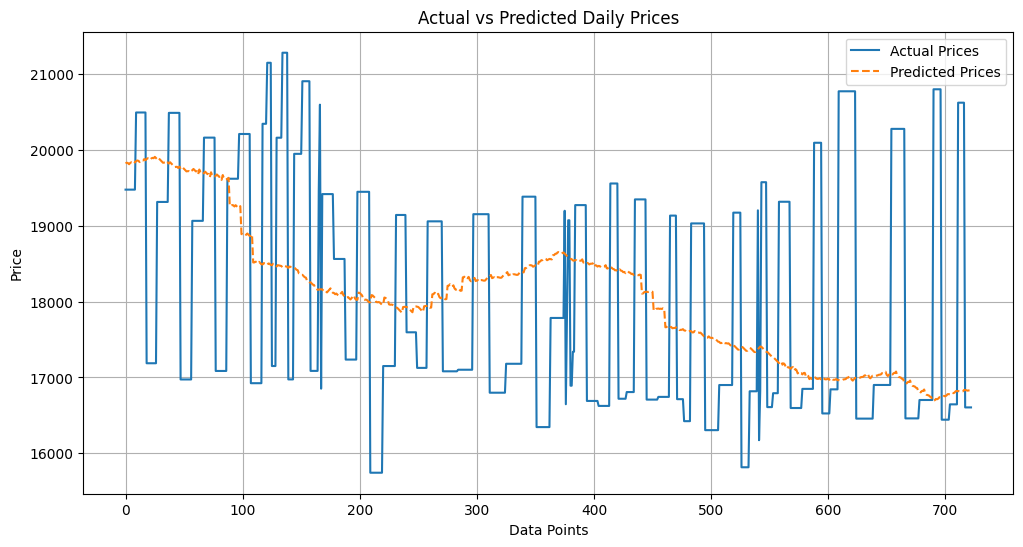

In [45]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
price_data = load_data(price_directory)
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

# Concatenate the first 9 months for training and last 3 months for testing
train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

# Format the 'Day' column
train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

# Merge the sentiment scores with the price data
train_data = pd.merge(train_price_data, train_sentiment_data, on='Day')
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day')

# Standardize the sentiment scores
scaler = StandardScaler()
train_data['Standardized Sentiment'] = scaler.fit_transform(train_data['Average Sentiment Score'].values.reshape(-1, 1))
test_data['Standardized Sentiment'] = scaler.transform(test_data['Average Sentiment Score'].values.reshape(-1, 1))

# Prepare data for training
X_train = train_data['Standardized Sentiment'].values.reshape(-1, 1)
y_train = train_data['Value2'].diff().fillna(0).values

# Train the model
model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict daily price changes for the test data
predicted_changes_daily = model.predict(test_data['Standardized Sentiment'].values.reshape(-1, 1)) * -1

# Initialize an empty list to store the daily predicted prices
predicted_prices_daily = [train_data['Value2'].values[-1]]

# Calculate the predicted prices
for change in predicted_changes_daily:
    predicted_prices_daily.append(predicted_prices_daily[-1] + change)

# Remove the first prediction since it's the last known price
predicted_prices_daily = predicted_prices_daily[1:]

# Plot the actual vs. predicted prices
plt.figure(figsize=(12,6))
plt.plot(test_data['Value2'].values, label='Actual Prices')
plt.plot(predicted_prices_daily, label='Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs Predicted Daily Prices')
plt.grid(True)
plt.show()


# Random forest regressor 2022 Full data test

       Timestamp                Date        Value1        Value2  \
0  1664582400000 2022-10-01 03:00:00  3.732221e+11  19476.926596   
1  1664582400000 2022-10-01 03:00:00  3.732221e+11  19476.926596   
2  1664582400000 2022-10-01 03:00:00  3.732221e+11  19476.926596   
3  1664582400000 2022-10-01 03:00:00  3.732221e+11  19476.926596   
4  1664582400000 2022-10-01 03:00:00  3.732221e+11  19476.926596   

         Value3  Day                                               File  \
0  3.784867e+10    1  Digihost_Bucks_Bearish_Trend_Among_Bitcoin_Min...   
1  3.784867e+10    1  Dogecoin_Led_the_Pack_Among_Cryptocurrencies_i...   
2  3.784867e+10    1  Dollar_Reversal_Could_Bring_Inflationary_Press...   
3  3.784867e+10    1  MicroStrategy_Reported_Impairment_Charge_of_$7...   
4  3.784867e+10    1  Uniswap_Surpasses_Bitcoin_as_Fed_Rate_Hike_Dec...   

   Average Sentiment Score  Standardized Sentiment  
0                -0.234887               -1.277403  
1                -0.004878        

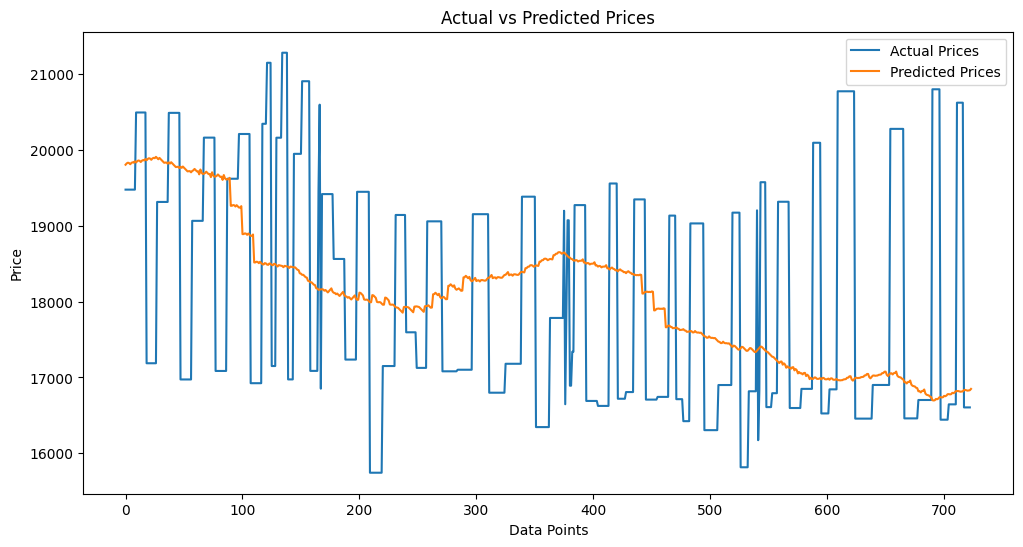

In [46]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
price_data = load_data(price_directory)
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

# Assume the data is ordered chronologically, concatenate the first 9 months for training and last 3 months for testing
train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

# Ensure the 'Day' column exists and is formatted correctly
train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

# Merge the sentiment scores with the price data
train_data = pd.merge(train_price_data, train_sentiment_data, on='Day')
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day')

# Standardize the sentiment scores
scaler = StandardScaler()
train_data['Standardized Sentiment'] = scaler.fit_transform(train_data['Average Sentiment Score'].values.reshape(-1, 1))
test_data['Standardized Sentiment'] = scaler.transform(test_data['Average Sentiment Score'].values.reshape(-1, 1))
print(test_data.head())
# Prepare data for training
# Assuming we have the data loaded into the variables:
# train_data and test_data

# Prepare data for training
X_train = train_data['Standardized Sentiment'].values.reshape(-1, 1)
y_train = train_data['Value2'].diff().fillna(0).values  # Training with price changes

# Train a Random Forest model with adjusted hyperparameters
model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Prepare data for testing
X_test = test_data['Standardized Sentiment'].values.reshape(-1, 1)

# Get the last known price
last_known_price = train_data['Value2'].values[-1]

# Predict price changes
predicted_changes = model.predict(X_test) * -1

# Apply the predicted changes to get the predicted prices
predicted_prices = np.cumsum(np.insert(predicted_changes, 0, last_known_price))

# Plot the actual and predicted prices
plt.figure(figsize=(12,6))
plt.plot(test_data['Value2'].values, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()



# Prediction with last known price for the day

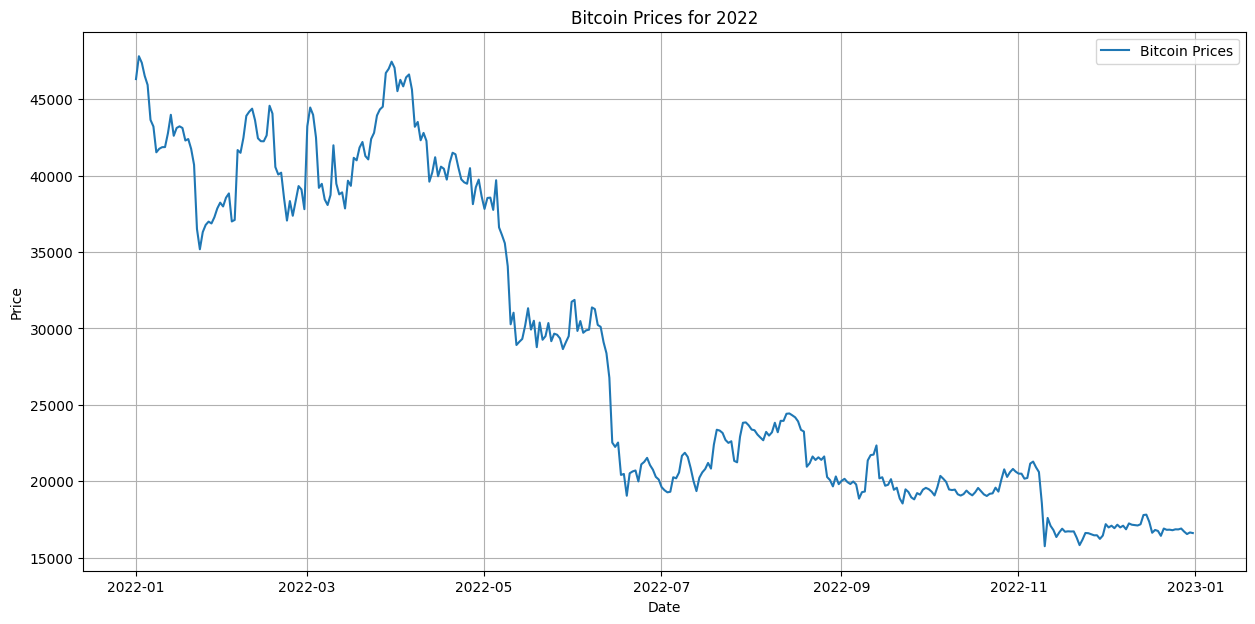

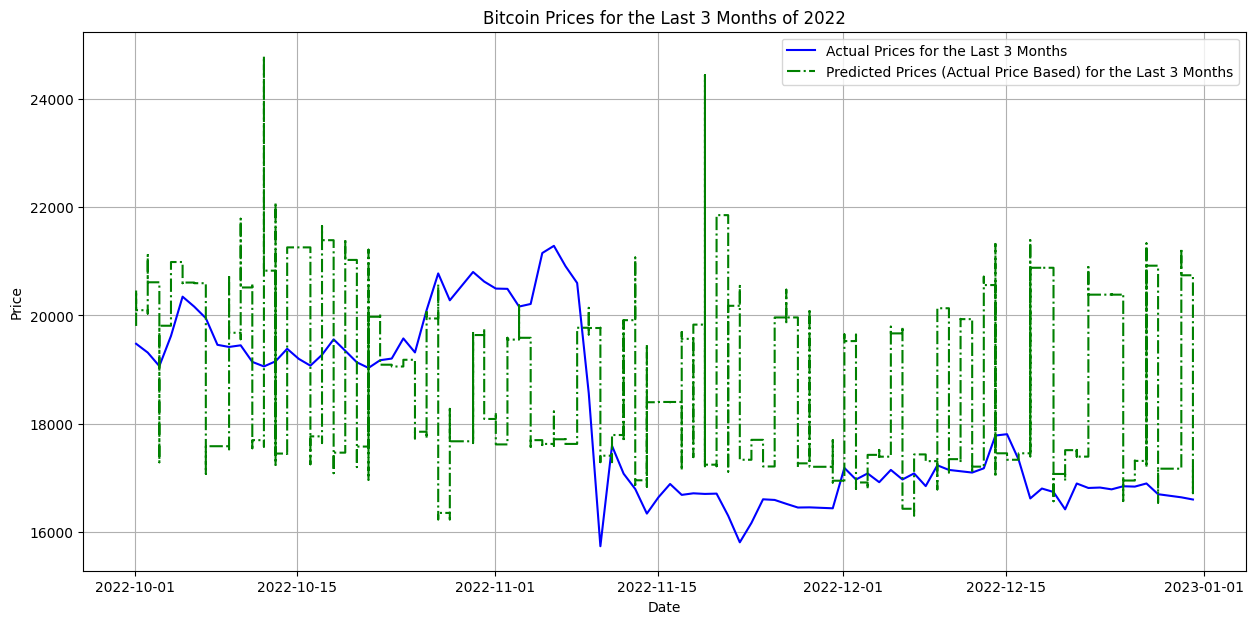

In [14]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Plot all Bitcoin prices for 12 months
all_data = pd.concat(price_data)
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Value2'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

train_data = pd.merge(train_price_data, train_sentiment_data, on='Day')
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day')

train_data['Last Known Price'] = train_data['Value2'].shift(1).fillna(method='bfill')
test_data['Last Known Price'] = test_data['Value2'].shift(1).fillna(method='bfill')

scaler = StandardScaler()
train_data['Standardized Sentiment'] = scaler.fit_transform(train_data['Average Sentiment Score'].values.reshape(-1, 1))
test_data['Standardized Sentiment'] = scaler.transform(test_data['Average Sentiment Score'].values.reshape(-1, 1))

# Preparing data for training
features_train = train_data[['Standardized Sentiment', 'Last Known Price']].values
y_train = train_data['Value2'].diff().fillna(0).values

model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
model.fit(features_train, y_train)  # Training the model

# Preparing data for prediction
features_test = test_data[['Standardized Sentiment', 'Last Known Price']].values

# New prediction approach
last_known_price = train_data['Value2'].values[-1]
predicted_prices_actual_based = [last_known_price]
for i in range(len(test_data)):
    # Getting both features for the ith data point
    features = test_data[['Standardized Sentiment', 'Last Known Price']].iloc[i].values.reshape(1, -1)
    price_change = model.predict(features)[0]
    last_known_price_actual = test_data['Value2'].iloc[i]
    predicted_price_actual_based = last_known_price_actual + price_change
    predicted_prices_actual_based.append(predicted_price_actual_based)

predicted_prices_actual_based.pop()  # Remove the last predicted price as it goes beyond the last day

test_data = test_data.sort_values(by='Date')
plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(test_data['Date'], dayfirst=True), test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b')
plt.plot(pd.to_datetime(test_data['Date'], dayfirst=True), predicted_prices_actual_based, label='Predicted Prices (Actual Price Based) for the Last 3 Months', color='g', linestyle='-.', drawstyle='steps-post')
plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
train_data

,Timestamp,Date,Value1,Value2,Value3,Day,File,Average Sentiment Score,Standardized Sentiment,Last Known Price
0,1640995200000,2022-01-01 02:00:00,8.761929e+11,46319.651088,2.589535e+10,1,Bitcoin's_'Guppy'_Indicator_Flashes_Green_for_...,-0.045758,-0.798019,1.513239
1,1640995200000,2022-01-01 02:00:00,8.761929e+11,46319.651088,2.589535e+10,1,Bitcoin_Drops_to_$45K_Support_as_Analysts_Poin...,0.104579,-0.416961,1.513239
2,1640995200000,2022-01-01 02:00:00,8.761929e+11,46319.651088,2.589535e+10,1,Bitcoin_Ends_Q1_Closely_Following_S&P_500.txt,0.146127,-0.311650,1.513239
3,1640995200000,2022-01-01 02:00:00,8.761929e+11,46319.651088,2.589535e+10,1,Bitcoin_Miner_PrimeBlock_Plans_to_Go_Public_Wi...,0.796116,1.335872,1.513239
4,1640995200000,2022-01-01 02:00:00,8.761929e+11,46319.651088,2.589535e+10,1,Elizabeth_Warren_Calls_for_US_to_Create_a_CBDC...,0.838484,1.443263,1.513239
...,...,...,...,...,...,...,...,...,...,...
6913,1661904000000,2022-08-31 03:00:00,3.795552e+11,19805.350699,3.030899e+10,31,Bitcoin's_March_Gains_Help_Erase_Memories_(and...,-0.364903,-1.606954,-1.248736
6914,1661904000000,2022-08-31 03:00:00,3.795552e+11,19805.350699,3.030899e+10,31,Bitcoin_Dips_From_$48K_Resistance;_Support_at_...,-0.065889,-0.849046,-1.248736
6915,1661904000000,2022-08-31 03:00:00,3.795552e+11,19805.350699,3.030899e+10,31,Bitcoin_Slides_for_Second_Day_as_Analyst_Warns...,0.004853,-0.669735,-1.248736
6916,1661904000000,2022-08-31 03:00:00,3.795552e+11,19805.350699,3.030899e+10,31,Solana’s_SOL_Highest_Gainer_Among_Major_Crypto...,-0.649749,-2.328949,-1.248736


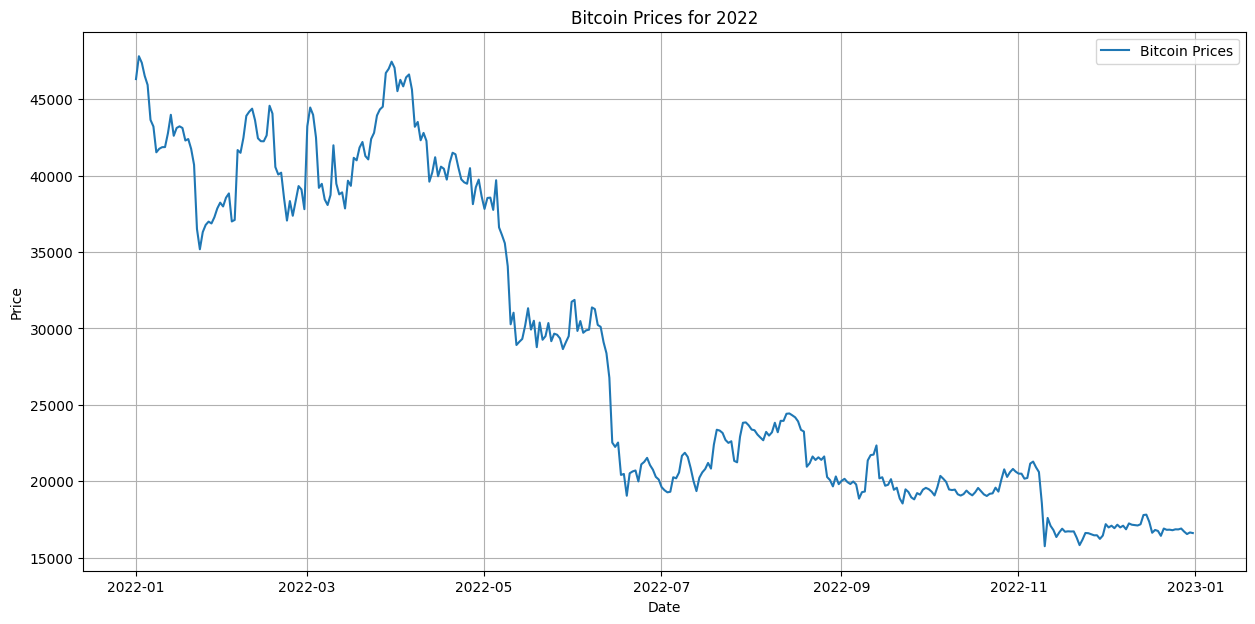

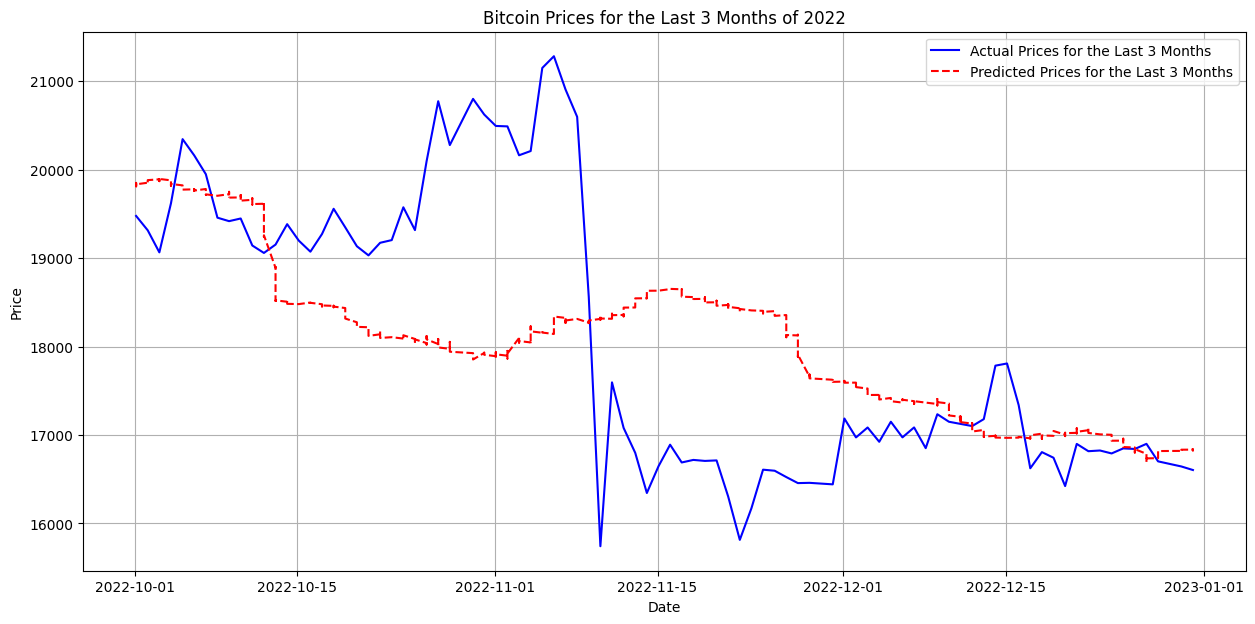

In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Plot all Bitcoin prices for 12 months
# Plot all Bitcoin prices for 12 months
all_data = pd.concat(price_data)

# Sort data by Date before plotting
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Value2'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

train_data = pd.merge(train_price_data, train_sentiment_data, on='Day')
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day')

scaler = StandardScaler()
train_data['Standardized Sentiment'] = scaler.fit_transform(train_data['Average Sentiment Score'].values.reshape(-1, 1))
test_data['Standardized Sentiment'] = scaler.transform(test_data['Average Sentiment Score'].values.reshape(-1, 1))

X_train = train_data['Standardized Sentiment'].values.reshape(-1, 1)
y_train = train_data['Value2'].diff().fillna(0).values

model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train, y_train)

X_test = test_data['Standardized Sentiment'].values.reshape(-1, 1)
last_known_price = train_data['Value2'].values[-1]
predicted_changes = model.predict(X_test) * -1
predicted_prices = np.cumsum(np.insert(predicted_changes, 0, last_known_price))

test_data = test_data.sort_values(by='Date')
plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(test_data['Date'], dayfirst=True), test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b')
plt.plot(pd.to_datetime(test_data['Date'], dayfirst=True), predicted_prices[1:], label='Predicted Prices for the Last 3 Months', color='r', linestyle='--')
plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

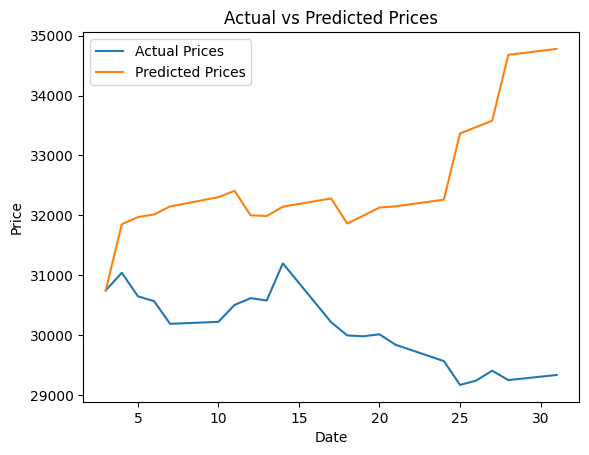

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load data
june_prices = pd.read_csv('june_data.csv', parse_dates=['Date'], index_col='Date')
july_prices = pd.read_csv('july_data.csv', parse_dates=['Date'], index_col='Date')
june_sentiment = pd.read_csv('classification_results_train.csv')
july_sentiment = pd.read_csv('classification_results.csv')

# Process data
june_prices['Day'] = june_prices.index.day
july_prices['Day'] = july_prices.index.day

# Merge sentiment scores with price data
june_data = pd.merge(june_prices, june_sentiment, on='Day')
july_data = pd.merge(july_prices, july_sentiment, on='Day')

# Compute daily average prices and sentiment scores
june_daily_data = june_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})
july_daily_data = july_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})

# Compute daily price changes for training
june_daily_data['Price Change'] = june_daily_data['Value2'].diff().fillna(0)

# Prepare data for training
X_train = june_daily_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = june_daily_data['Price Change'].values

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize an empty list to store predicted prices
predicted_prices = []

# Get the starting price from the first day of July
starting_price = july_daily_data['Value2'].iloc[0]

# Append the starting price to the list of predicted prices
predicted_prices.append(starting_price)

# Predict price changes for each day in July and update the predicted price
for i in range(len(july_daily_data)):
    sentiment_score = july_daily_data['Average Sentiment Score'].iloc[i].reshape(1, -1)
    price_change = model.predict(sentiment_score)[0]
    predicted_price = predicted_prices[-1] + price_change
    predicted_prices.append(predicted_price)

# Remove the last predicted price as it goes beyond the last day of July
predicted_prices.pop()

# Plot the actual and predicted prices
plt.plot(july_daily_data.index, july_daily_data['Value2'], label='Actual Prices')
plt.plot(july_daily_data.index, predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


# Linear Regression

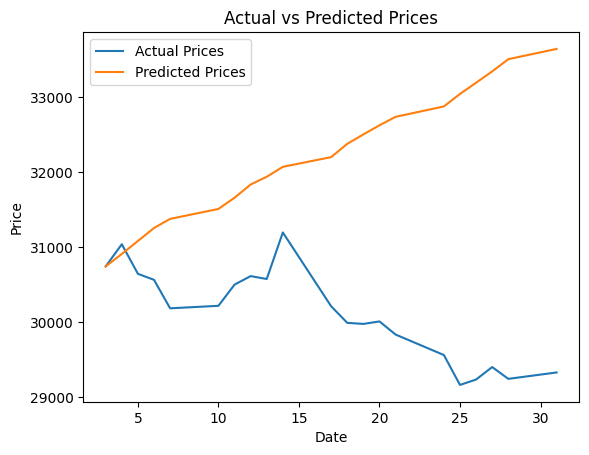

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
june_prices = pd.read_csv('june_data.csv', parse_dates=['Date'], index_col='Date')
july_prices = pd.read_csv('july_data.csv', parse_dates=['Date'], index_col='Date')
june_sentiment = pd.read_csv('classification_results_train.csv')
july_sentiment = pd.read_csv('classification_results.csv')

# Process data
june_prices['Day'] = june_prices.index.day
july_prices['Day'] = july_prices.index.day

# Merge sentiment scores with price data
june_data = pd.merge(june_prices, june_sentiment, on='Day')
july_data = pd.merge(july_prices, july_sentiment, on='Day')

# Compute daily average prices and sentiment scores
june_daily_data = june_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})
july_daily_data = july_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})

# Compute daily price changes for training
june_daily_data['Price Change'] = june_daily_data['Value2'].diff().fillna(0)

# Prepare data for training
X_train = june_daily_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = june_daily_data['Price Change'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize an empty list to store predicted prices
predicted_prices = []

# Get the starting price from the first day of July
starting_price = july_daily_data['Value2'].iloc[0]

# Append the starting price to the list of predicted prices
predicted_prices.append(starting_price)

# Predict price changes for each day in July and update the predicted price
for i in range(len(july_daily_data)):
    sentiment_score = july_daily_data['Average Sentiment Score'].iloc[i].reshape(1, -1)
    price_change = model.predict(sentiment_score)[0]
    predicted_price = predicted_prices[-1] + price_change
    predicted_prices.append(predicted_price)

# Remove the last predicted price as it goes beyond the last day of July
predicted_prices.pop()

# Plot the actual and predicted prices
plt.plot(july_daily_data.index, july_daily_data['Value2'], label='Actual Prices')
plt.plot(july_daily_data.index, predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


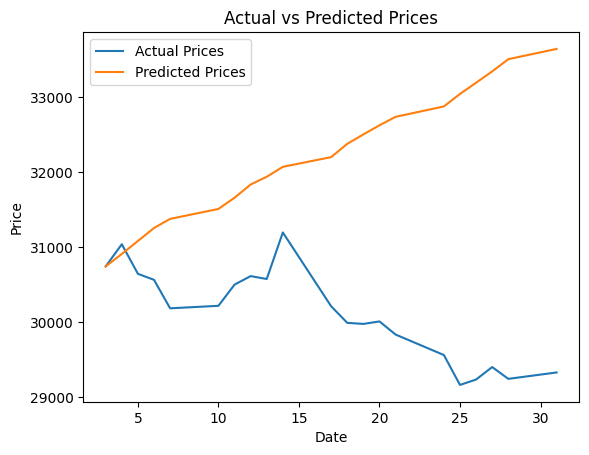

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
june_prices = pd.read_csv('june_data.csv', parse_dates=['Date'], index_col='Date')
july_prices = pd.read_csv('july_data.csv', parse_dates=['Date'], index_col='Date')
june_sentiment = pd.read_csv('classification_results_train.csv')
july_sentiment = pd.read_csv('classification_results.csv')

# Process data
june_prices['Day'] = june_prices.index.day
july_prices['Day'] = july_prices.index.day

# Merge sentiment scores with price data
june_data = pd.merge(june_prices, june_sentiment, on='Day')
july_data = pd.merge(july_prices, july_sentiment, on='Day')

# Compute daily average prices and sentiment scores
june_daily_data = june_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})
july_daily_data = july_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})

# Compute daily price changes for training
june_daily_data['Price Change'] = june_daily_data['Value2'].diff().fillna(0)

# Prepare data for training
X_train = june_daily_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = june_daily_data['Price Change'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize an empty list to store predicted prices
predicted_prices = []

# Get the starting price from the first day of July
starting_price = july_daily_data['Value2'].iloc[0]

# Append the starting price to the list of predicted prices
predicted_prices.append(starting_price)

# Predict price changes for each day in July and update the predicted price
for i in range(len(july_daily_data)):
    sentiment_score = july_daily_data['Average Sentiment Score'].iloc[i].reshape(1, -1)
    price_change = model.predict(sentiment_score)[0]
    predicted_price = predicted_prices[-1] + price_change
    predicted_prices.append(predicted_price)

# Remove the last predicted price as it goes beyond the last day of July
predicted_prices.pop()

# Plot the actual and predicted prices
plt.plot(july_daily_data.index, july_daily_data['Value2'], label='Actual Prices')
plt.plot(july_daily_data.index, predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


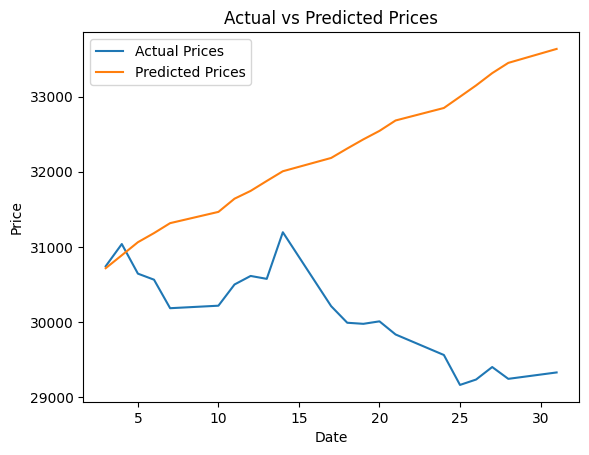

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
june_prices = pd.read_csv('june_data.csv', parse_dates=['Date'], index_col='Date')
july_prices = pd.read_csv('july_data.csv', parse_dates=['Date'], index_col='Date')
june_sentiment = pd.read_csv('classification_results_train.csv')
july_sentiment = pd.read_csv('classification_results.csv')

# Process data
june_prices['Day'] = june_prices.index.day
july_prices['Day'] = july_prices.index.day

# Merge sentiment scores with price data
june_data = pd.merge(june_prices, june_sentiment, on='Day')
july_data = pd.merge(july_prices, july_sentiment, on='Day')

# Compute daily average prices and sentiment scores
june_daily_data = june_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})
july_daily_data = july_data.groupby('Day').agg({'Value2': 'mean', 'Average Sentiment Score': 'mean'})

# Get the last price of June as the starting point
starting_price = june_daily_data['Value2'].iloc[-1]

# Prepare data for training
X_train = june_daily_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = june_daily_data['Value2'].diff().fillna(0).values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare data for prediction
X_test = july_daily_data['Average Sentiment Score'].values.reshape(-1, 1)

# Predict price changes
predicted_changes = model.predict(X_test)

# Apply the predicted changes to get the predicted prices
predicted_prices = starting_price + predicted_changes.cumsum()

# Plot the actual and predicted prices
plt.plot(july_daily_data.index, july_daily_data['Value2'], label='Actual Prices')
plt.plot(july_daily_data.index, predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


# Linear regression for 9 months train 3 predict

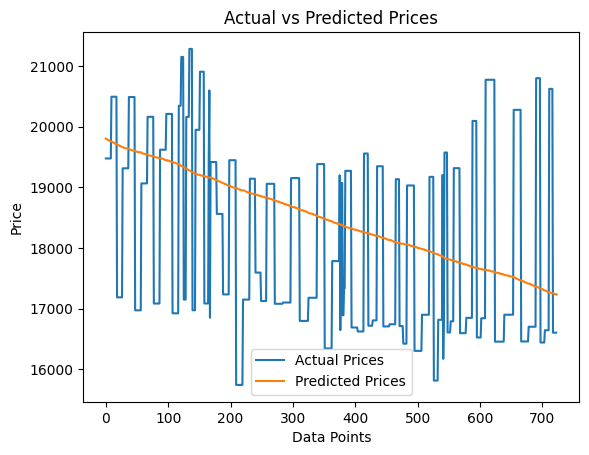

In [38]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
price_data = load_data(price_directory)
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

# Assume the data is ordered chronologically, concatenate the first 9 months for training and last 3 months for testing
train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

# Ensure the 'Day' column exists and is formatted correctly
train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

# Merge the sentiment scores with the price data
train_data = pd.merge(train_price_data, train_sentiment_data, on='Day')
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day')

# Prepare data for training
X_train = train_data['Average Sentiment Score'].values.reshape(-1, 1)
y_train = train_data['Value2'].diff().fillna(0).values  # Training with price changes

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare data for testing
X_test = test_data['Average Sentiment Score'].values.reshape(-1, 1)

# Get the last known price
last_known_price = train_data['Value2'].values[-1]

# Predict price changes
predicted_changes = model.predict(X_test)

# Apply the predicted changes to get the predicted prices
predicted_prices = np.cumsum(np.insert(predicted_changes, 0, last_known_price))

# Plot the actual and predicted prices
plt.plot(test_data['Value2'].values, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()


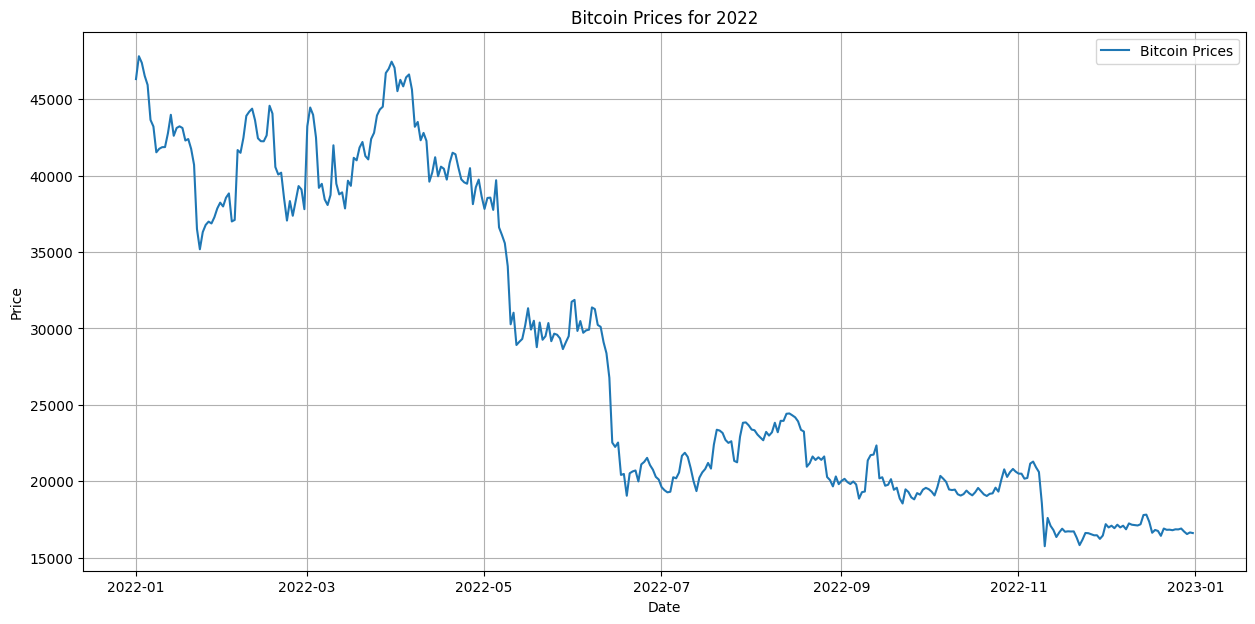

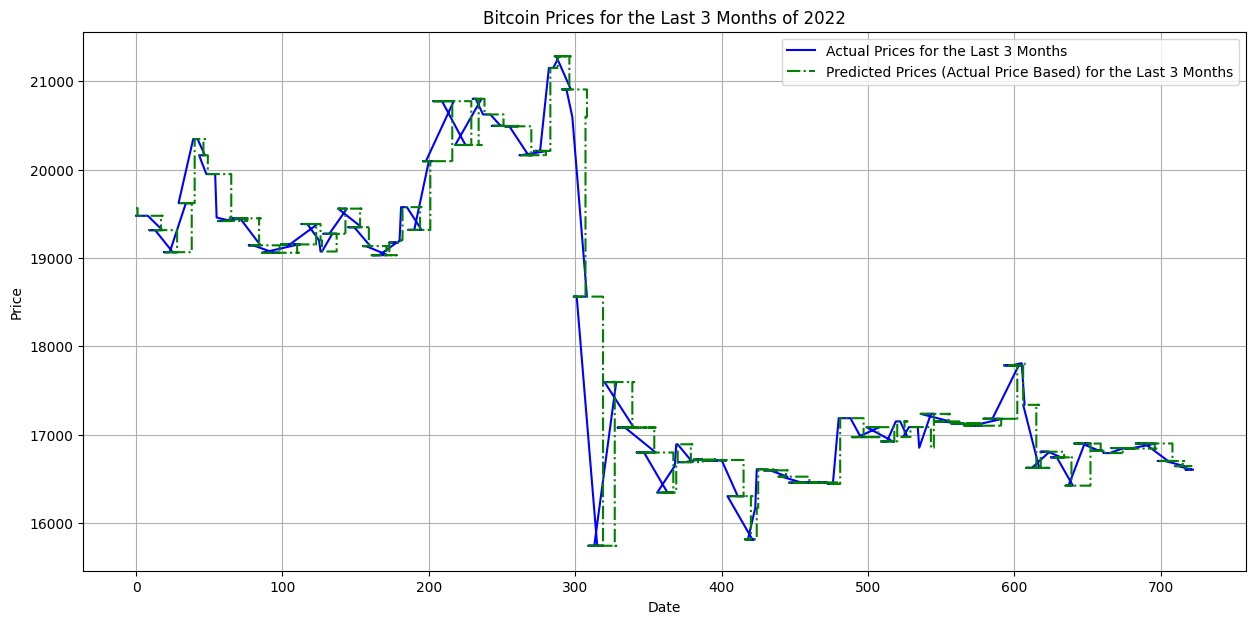

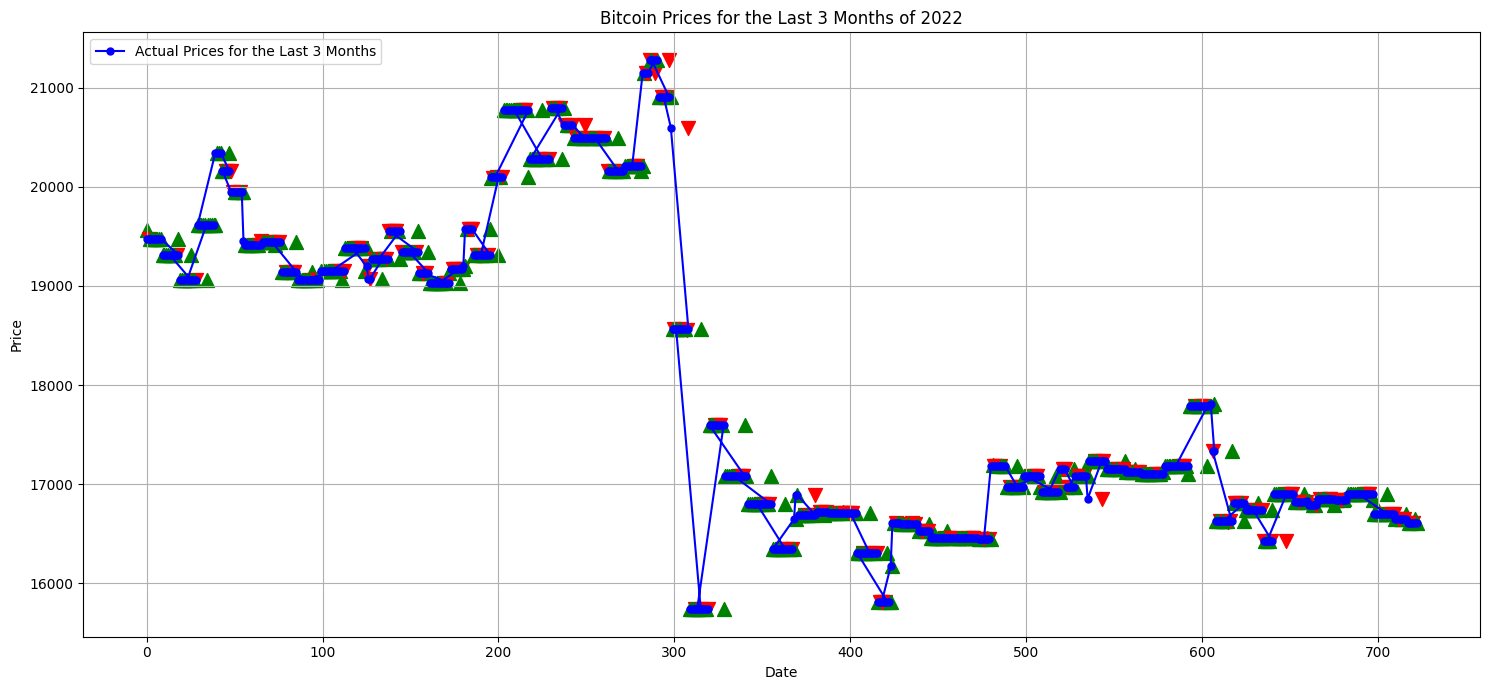

In [36]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Plot all Bitcoin prices for 12 months
all_data = pd.concat(price_data)
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Value2'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

train_data = train_data.sort_values(by='Date')
test_data = test_data.sort_values(by='Date')

# Convert the PeriodIndex to a TimestampIndex
test_data.index = pd.to_datetime(test_data.index, unit='D')

# Convert the DatetimeIndex to a PeriodIndex with daily frequency
#train_data.index = train_data.index.to_period('D')
#test_data.index = test_data.index.to_period('D')

# Fit ARIMA model
model = ARIMA(train_data['Value2'], order=(5,1,0))  # Adjust order as necessary
model_fit = model.fit()
# New prediction approach
last_known_price = train_data['Value2'].values[-1]
predicted_prices_actual_based = []
for i in range(len(test_data)):
    # Extend train data with test data up to current point
    extended_train_data = pd.concat([train_data['Value2'], test_data['Value2'].iloc[:i]])
    extended_train_data = extended_train_data.reset_index(drop=True)  # Reset the index
    model = ARIMA(extended_train_data, order=(5,1,0))  # Adjust order as necessary
    model_fit = model.fit()
    # Predict the next value
    forecast = model_fit.forecast(steps=1).iloc[0]  # use iloc to access the first element
    predicted_prices_actual_based.append(forecast)
# Reset index for plotting
test_data.reset_index(drop=True, inplace=True)

test_data = test_data.sort_values(by='Date')
plt.figure(figsize=(15,7))
plt.plot(test_data.index, test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b')
plt.plot(test_data.index, predicted_prices_actual_based, label='Predicted Prices (Actual Price Based) for the Last 3 Months', color='g', linestyle='-.', drawstyle='steps-post')
plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(15,7))

# Plot actual prices
plt.plot(test_data.index, test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b', marker='o', markersize=5)

# Calculate the direction of predictions (up or down)
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))

# Plot predicted prices with color-coded markers based on direction
for idx, (price, direction) in enumerate(zip(predicted_prices_actual_based, directions)):
    color = 'g' if direction >= 0 else 'r'  # green for up, red for down
    plt.scatter(test_data.index[idx], price, color=color, marker='^' if direction >= 0 else 'v', s=100)

plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

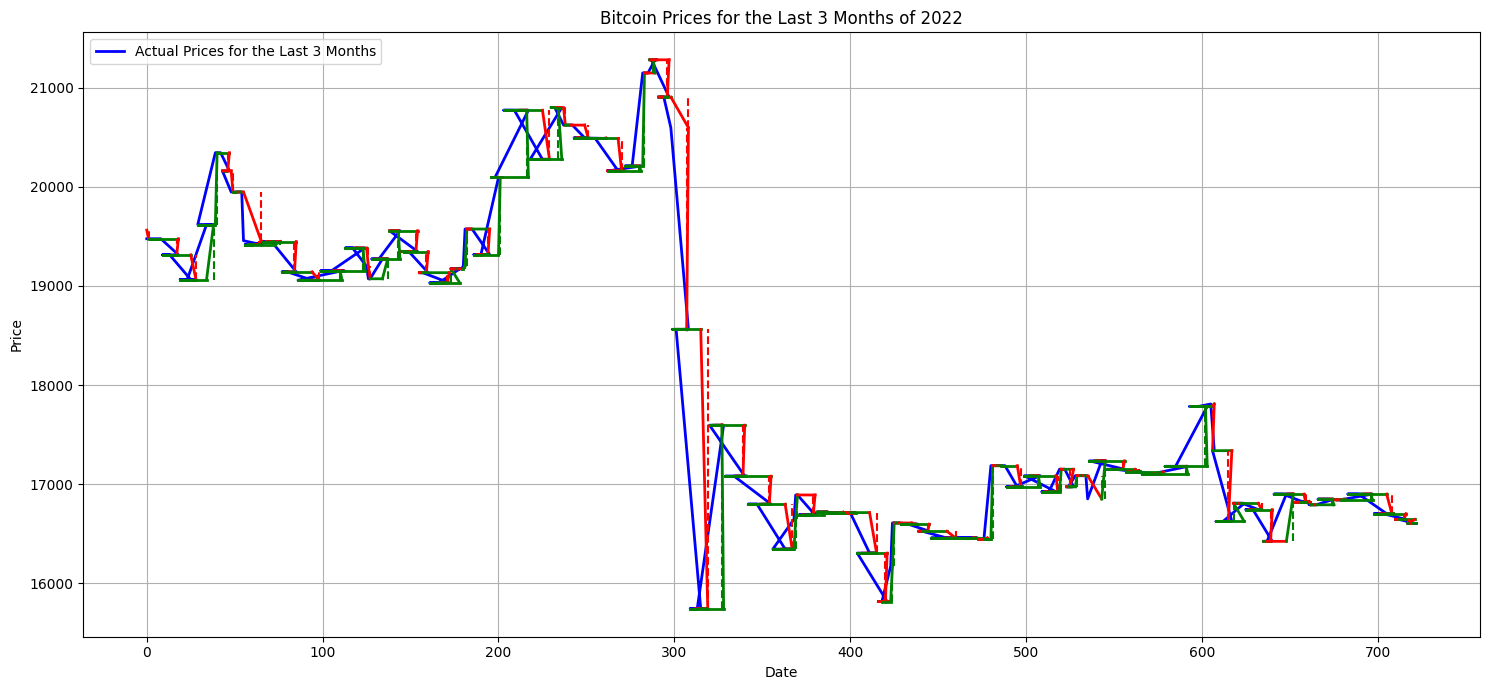

In [38]:
plt.figure(figsize=(15,7))

# Plot actual prices
plt.plot(test_data.index, test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b', linestyle='-', linewidth=2)

# Calculate the direction of predictions (up or down)
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))

# Plot predictions with colored line segments based on direction
for idx in range(1, len(predicted_prices_actual_based)):
    color = 'g' if directions[idx] >= 0 else 'r'
    plt.plot(test_data.index[idx-1:idx+1], predicted_prices_actual_based[idx-1:idx+1], color=color, linestyle='-', linewidth=2)
    plt.vlines(test_data.index[idx], min(predicted_prices_actual_based[idx-1:idx+1]), max(predicted_prices_actual_based[idx-1:idx+1]), color=color, linestyle='dashed', linewidth=1.5)

plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

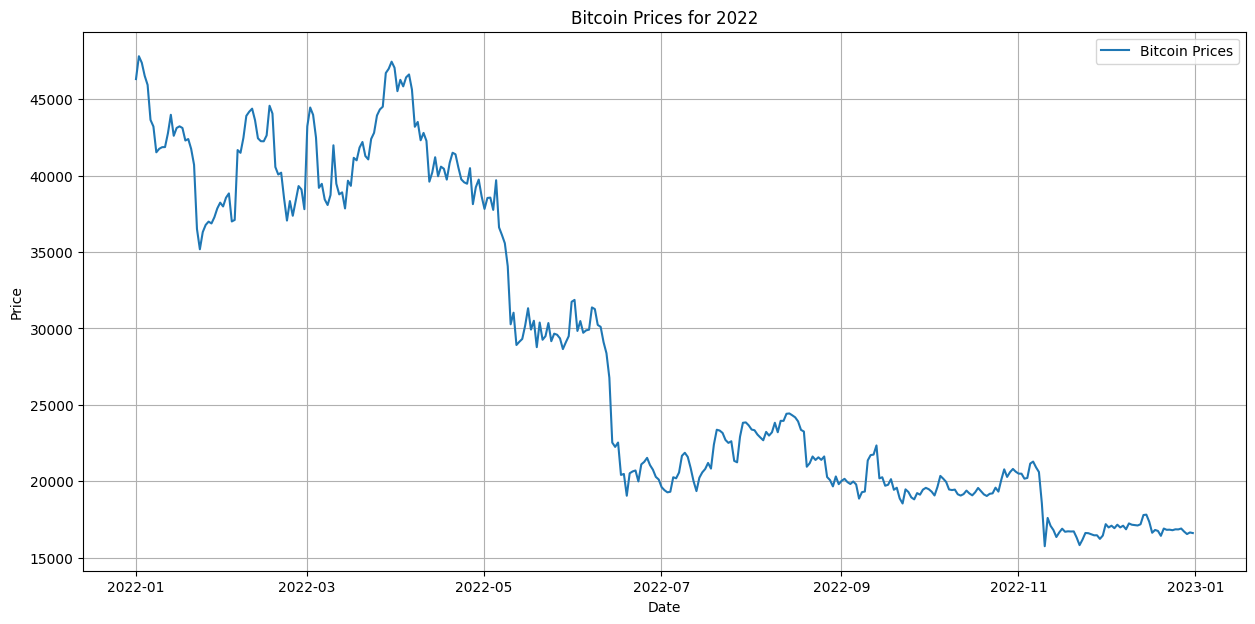

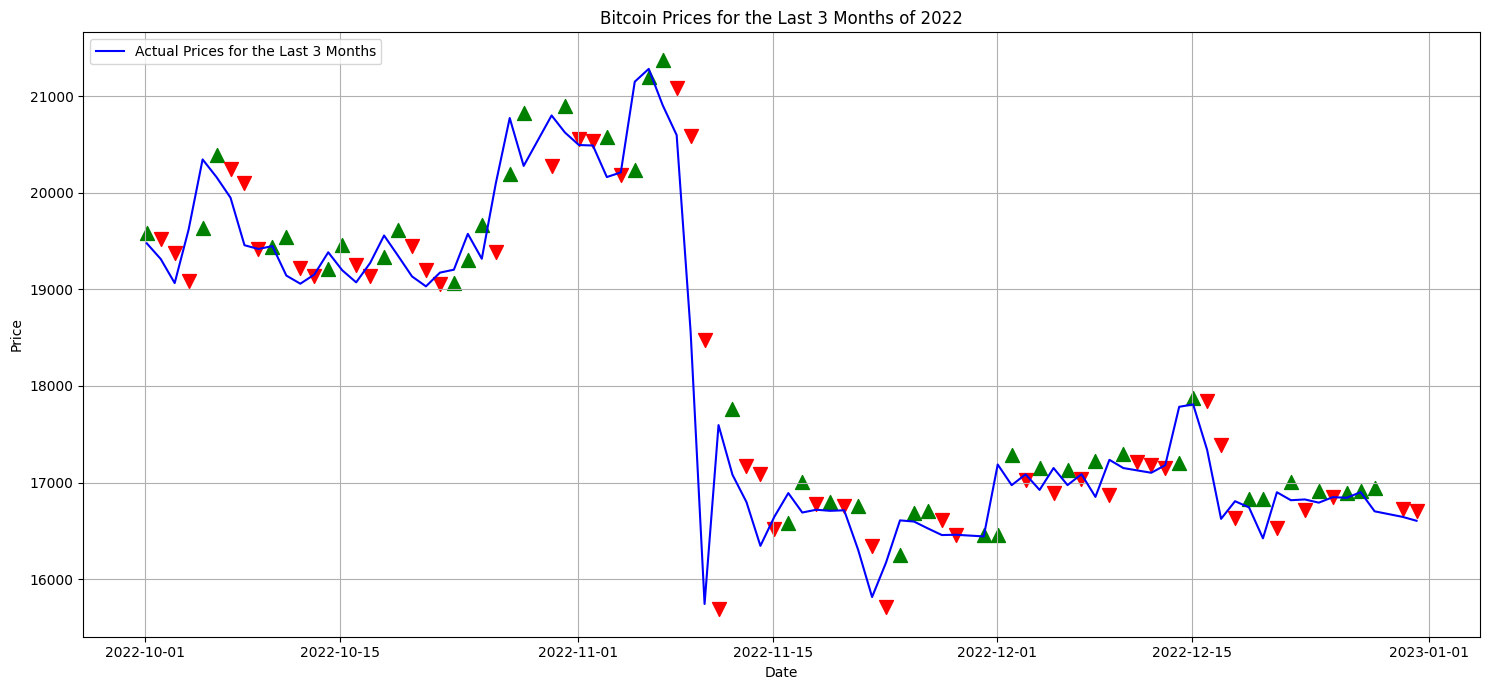

In [48]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Plot all Bitcoin prices for 12 months
all_data = pd.concat(price_data)
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Value2'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day

# Deduplicate dates and take average sentiment
# This replaces the step where you calculated 'AvgSentiment'
train_data = train_data.groupby('Date').agg({'Value2': 'first', 'Average Sentiment Score': 'mean'}).reset_index()
test_data = test_data.groupby('Date').agg({'Value2': 'first', 'Average Sentiment Score': 'mean'}).reset_index()

train_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)
test_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)

# Continue with ARIMA modelling
model = ARIMA(train_data['Value2'], order=(5,1,0))
model_fit = model.fit()

predicted_prices_actual_based = []
for i in range(len(test_data)):
    extended_train_data = pd.concat([train_data['Value2'], test_data['Value2'].iloc[:i]])
    extended_train_data = extended_train_data.reset_index(drop=True)
    model = ARIMA(extended_train_data, order=(5,1,0))
    model_fit = model.fit()
    
    # Modifying the forecast using sentiment data
    forecast = model_fit.forecast(steps=1).iloc[0]
    sentiment_modifier = test_data['AvgSentiment'].iloc[i]
    forecast += forecast * sentiment_modifier * 0.01  # Modify forecast by 1% of the sentiment value
    
    predicted_prices_actual_based.append(forecast)

# Plotting remains the same
plt.figure(figsize=(15,7))
plt.plot(test_data['Date'], test_data['Value2'], label='Actual Prices for the Last 3 Months', color='b')
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))
for idx, (price, direction) in enumerate(zip(predicted_prices_actual_based, directions)):
    color = 'g' if direction >= 0 else 'r'
    plt.scatter(test_data['Date'].iloc[idx], price, color=color, marker='^' if direction >= 0 else 'v', s=100)
plt.title('Bitcoin Prices for the Last 3 Months of 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA model

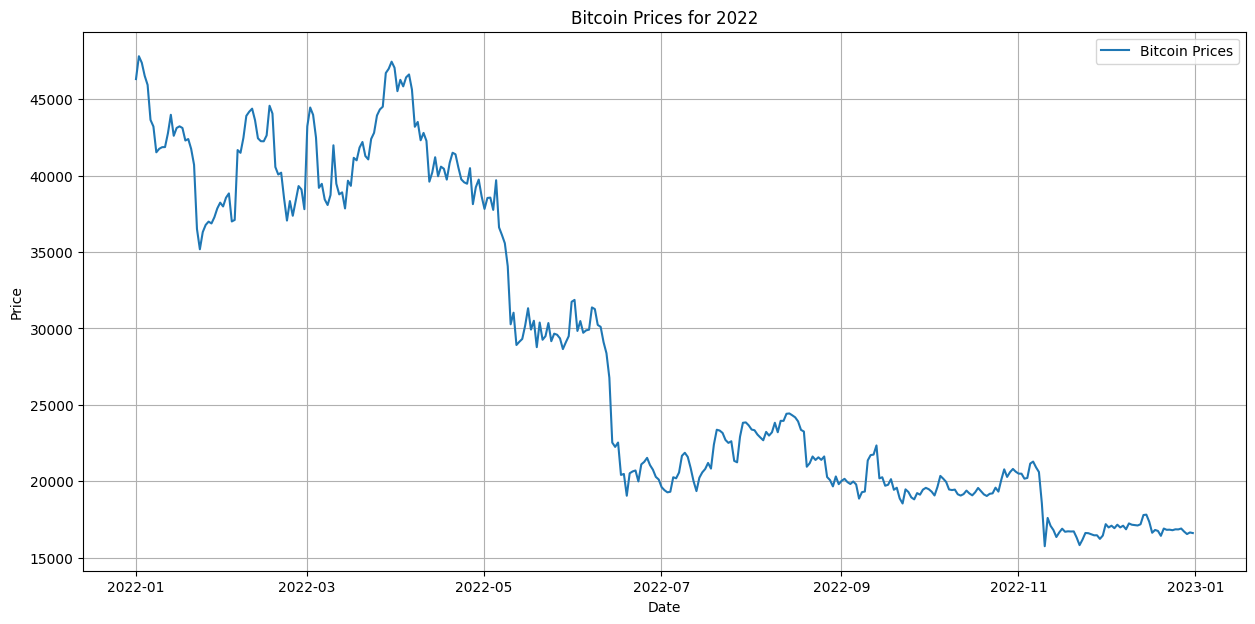

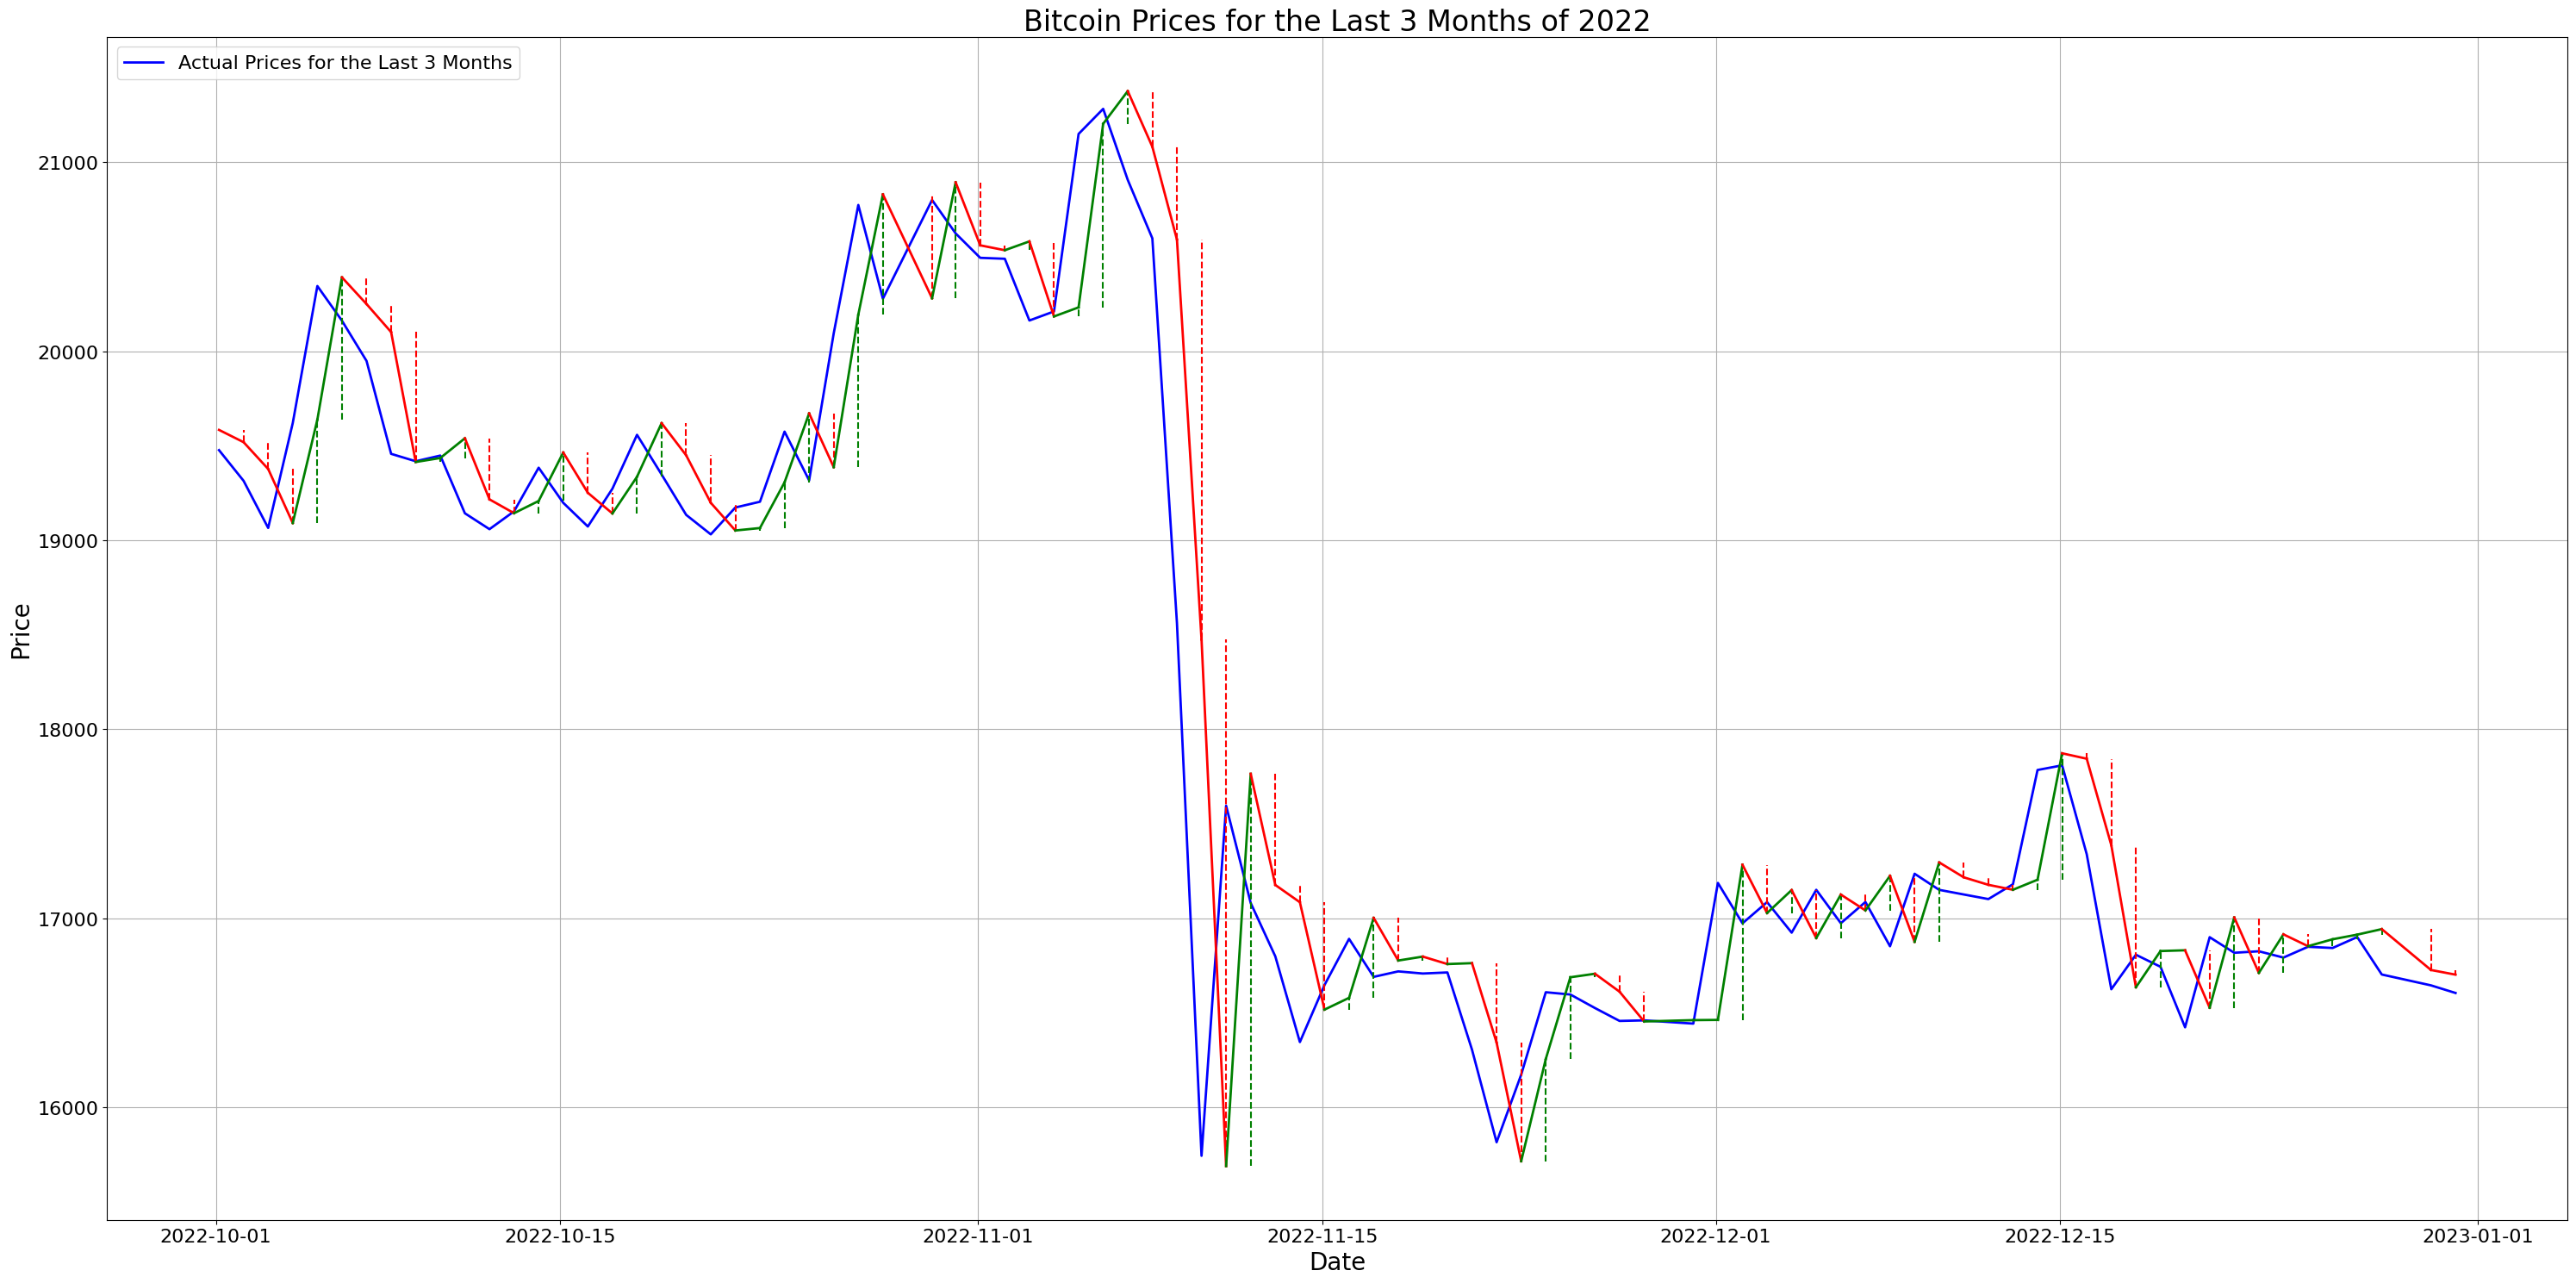

In [21]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Plot all Bitcoin prices for 12 months
all_data = pd.concat(price_data)
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Price'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day
train_data = pd.merge(train_price_data, train_sentiment_data, on='Day', suffixes=('_price', '_sentiment'))
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day', suffixes=('_price', '_sentiment'))
# Deduplicate dates and take average sentiment
# This replaces the step where you calculated 'AvgSentiment'
train_data = train_data.groupby('Date').agg({'Price': 'first', 'Average Sentiment Score': 'mean'}).reset_index()
test_data = test_data.groupby('Date').agg({'Price': 'first', 'Average Sentiment Score': 'mean'}).reset_index()

train_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)
test_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)

# Continue with ARIMA modelling
model = ARIMA(train_data['Price'], order=(5,1,0))
model_fit = model.fit()

predicted_prices_actual_based = []
for i in range(len(test_data)):
    extended_train_data = pd.concat([train_data['Price'], test_data['Price'].iloc[:i]])
    extended_train_data = extended_train_data.reset_index(drop=True)
    model = ARIMA(extended_train_data, order=(5,1,0))
    model_fit = model.fit()
    
    # Modifying the forecast using sentiment data
    forecast = model_fit.forecast(steps=1).iloc[0]
    sentiment_modifier = test_data['AvgSentiment'].iloc[i]
    forecast += forecast * sentiment_modifier * 0.01  # Modify forecast by 1% of the sentiment value
    
    predicted_prices_actual_based.append(forecast)

predicted_prices_actual_based = np.array(predicted_prices_actual_based)

plt.figure(figsize=(30, 15))  # Set figure size

# Plot actual prices
plt.plot(test_data['Date'], test_data['Price'], label='Actual Prices for the Last 3 Months', color='b', linestyle='-', linewidth=2)

# Calculate the direction of predictions (up or down)
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))

# Plot predictions with colored line segments based on direction
for idx in range(1, len(predicted_prices_actual_based)):
    color = 'g' if directions[idx] >= 0 else 'r'
    plt.plot(test_data['Date'].iloc[idx-1:idx+1], predicted_prices_actual_based[idx-1:idx+1], color=color, linestyle='-', linewidth=2)
    plt.vlines(test_data['Date'].iloc[idx], min(predicted_prices_actual_based[idx-1:idx+1]), max(predicted_prices_actual_based[idx-1:idx+1]), color=color, linestyle='dashed', linewidth=1.5)

plt.title('Bitcoin Prices for the Last 3 Months of 2022', fontsize=24)  # Set title font size
plt.xlabel('Date', fontsize=20)  # Set x-axis label font size
plt.ylabel('Price', fontsize=20)  # Set y-axis label font size
plt.legend(loc="upper left", fontsize=16)  # Set legend font size
plt.xticks(fontsize=16)  # Set x-axis ticks font size
plt.yticks(fontsize=16)  # Set y-axis ticks font size
plt.grid(True)
plt.tight_layout()

plt.savefig('bitcoin_prices.jpg', format='jpg', dpi=300)  # Save figure as JPG file

plt.show()

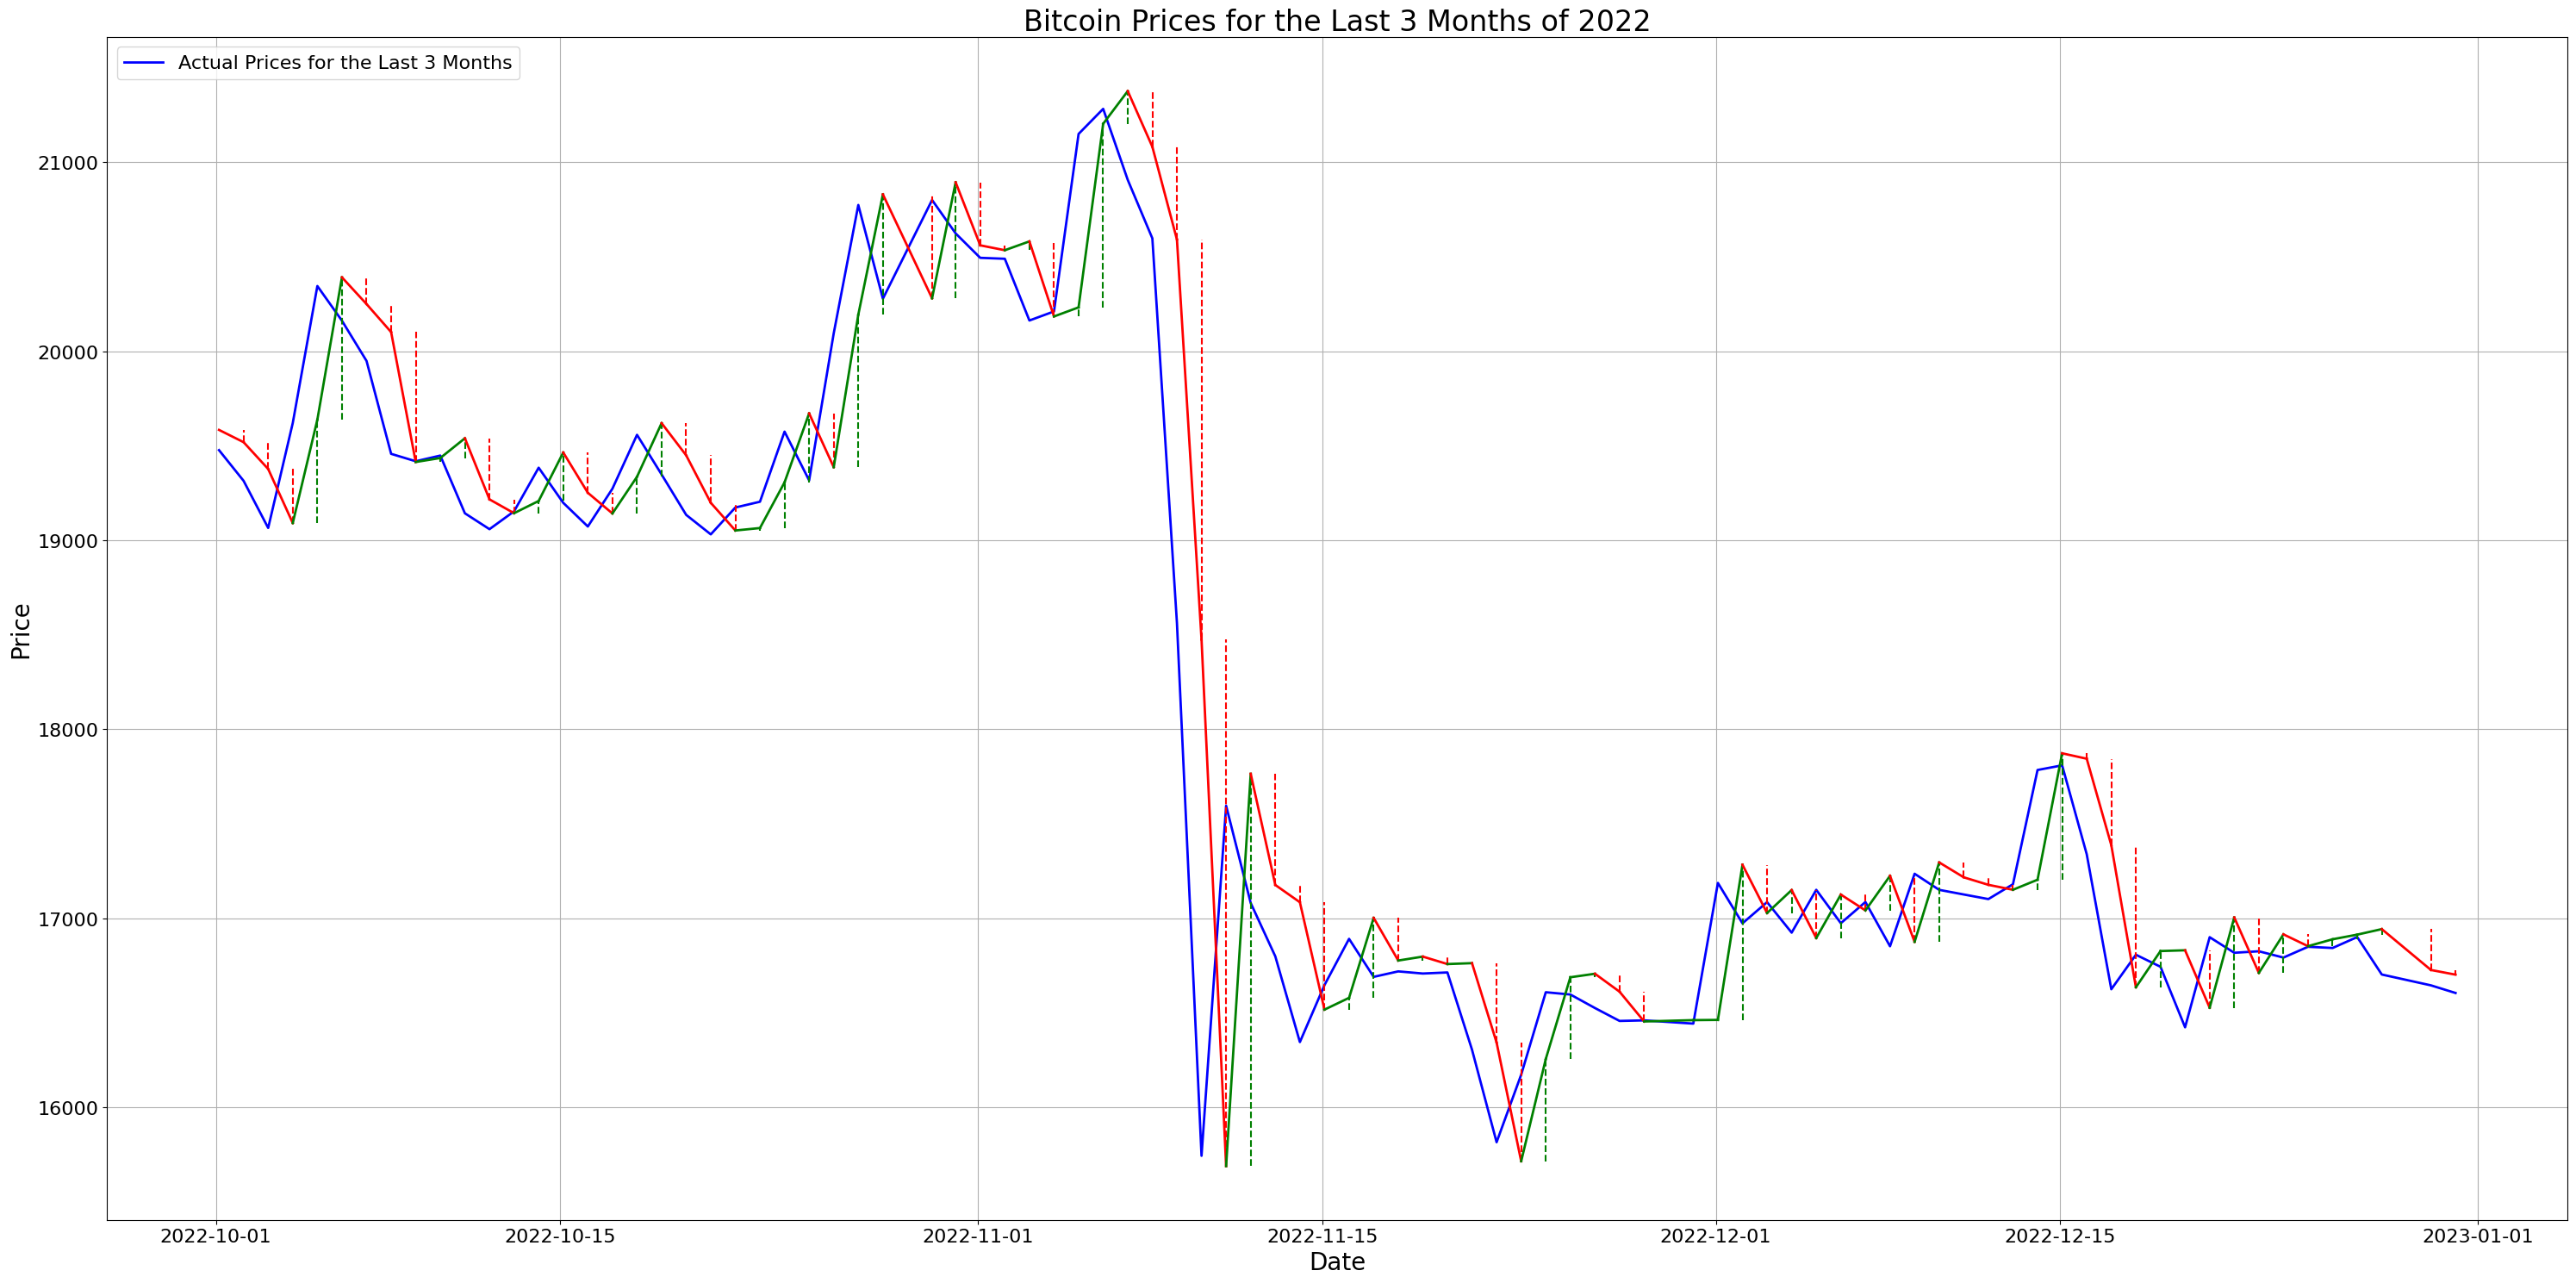

In [6]:
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

plt.figure(figsize=(30, 15))  # Set figure size

# Plot actual prices
plt.plot(test_data['Date'], test_data['Price'], label='Actual Prices for the Last 3 Months', color='b', linestyle='-', linewidth=2)

# Calculate the direction of predictions (up or down)
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))

# Plot predictions with colored line segments based on direction
for idx in range(1, len(predicted_prices_actual_based)):
    color = 'g' if directions[idx] >= 0 else 'r'
    plt.plot(test_data['Date'].iloc[idx-1:idx+1], predicted_prices_actual_based[idx-1:idx+1], color=color, linestyle='-', linewidth=2)
    plt.vlines(test_data['Date'].iloc[idx], min(predicted_prices_actual_based[idx-1:idx+1]), max(predicted_prices_actual_based[idx-1:idx+1]), color=color, linestyle='dashed', linewidth=1.5)

plt.title('Bitcoin Prices for the Last 3 Months of 2022', fontsize=24)  # Set title font size
plt.xlabel('Date', fontsize=20)  # Set x-axis label font size
plt.ylabel('Price', fontsize=20)  # Set y-axis label font size
plt.legend(loc="upper left", fontsize=16)  # Set legend font size
plt.xticks(fontsize=16)  # Set x-axis ticks font size
plt.yticks(fontsize=16)  # Set y-axis ticks font size
plt.grid(True)
plt.tight_layout()

plt.savefig('bitcoin_prices.jpg', format='jpg', dpi=300)  # Save figure as JPG file

plt.show()

Mean Percentage Error: 1.86%
Trend Similarity: 44.32%


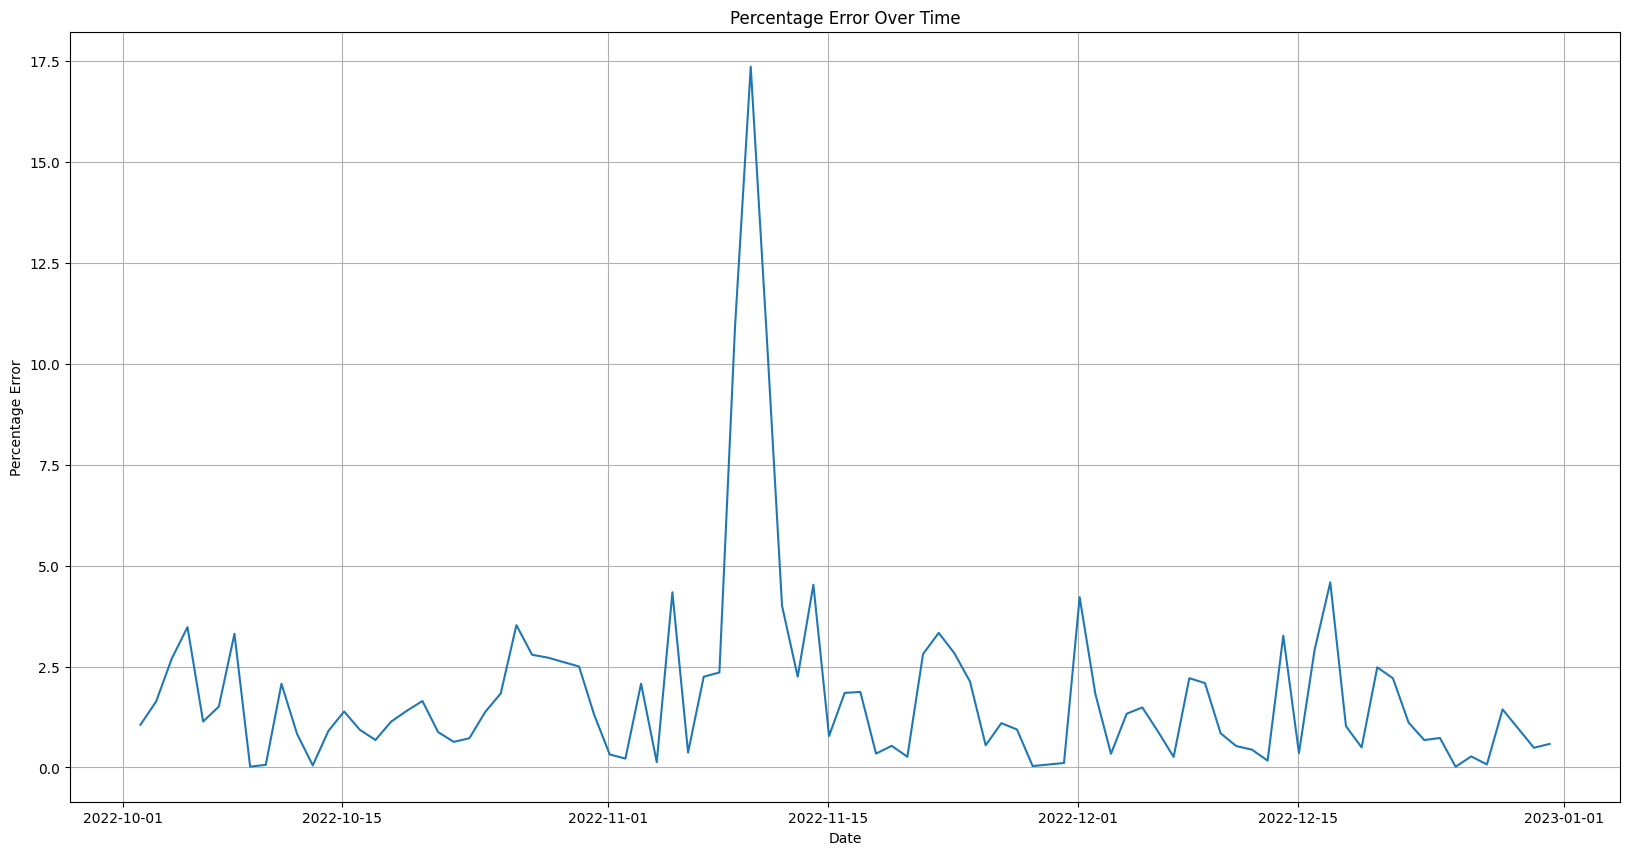

In [7]:
import numpy as np

# Assuming actual_prices is a numpy array of your actual prices
actual_prices = test_data['Value2'].values

# Your predicted prices
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

# Calculate percentage error
percentage_error = np.abs((actual_prices - predicted_prices_actual_based) / actual_prices) * 100

# Calculate the mean percentage error
mean_percentage_error = np.mean(percentage_error)

# Print mean percentage error
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')

# Calculate trend for actual and predicted prices
actual_trend = np.sign(np.diff(actual_prices))
predicted_trend = np.sign(np.diff(predicted_prices_actual_based))

# Calculate trend similarity
trend_similarity = np.sum(actual_trend == predicted_trend) / len(actual_trend) * 100

# Print trend similarity
print(f'Trend Similarity: {trend_similarity:.2f}%')

# If you want to visualize the percentage error
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(test_data['Date'][1:], percentage_error[1:])  # Starting from index 1 to match the length of actual_trend and predicted_trend
plt.title('Percentage Error Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Error')
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Assuming actual_prices is a numpy array of your actual prices
actual_prices = test_data['Value2'].values

# Your predicted prices
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

# Calculate daily trend for actual and predicted prices
actual_daily_trend = np.sign(np.diff(actual_prices))
predicted_daily_trend = np.sign(np.diff(predicted_prices_actual_based))

# Calculate daily trend similarity
daily_trend_similarity = np.sum(actual_daily_trend == predicted_daily_trend) / len(actual_daily_trend) * 100

# Print daily trend similarity
print(f'Daily Trend Similarity: {daily_trend_similarity:.2f}%')

# Resample to weekly, taking the last observation
actual_prices_series = pd.Series(actual_prices, index=test_data['Date'])
predicted_prices_series = pd.Series(predicted_prices_actual_based, index=test_data['Date'])

actual_weekly_prices = actual_prices_series.resample('W').last()
predicted_weekly_prices = predicted_prices_series.resample('W').last()

# Calculate weekly trend for actual and predicted prices
actual_weekly_trend = np.sign(np.diff(actual_weekly_prices.values))
predicted_weekly_trend = np.sign(np.diff(predicted_weekly_prices.values))

# Calculate weekly trend similarity
weekly_trend_similarity = np.sum(actual_weekly_trend == predicted_weekly_trend) / len(actual_weekly_trend) * 100

# Print weekly trend similarity
print(f'Weekly Trend Similarity: {weekly_trend_similarity:.2f}%')


Daily Trend Similarity: 44.32%
Weekly Trend Similarity: 84.62%


In [13]:
import numpy as np
import pandas as pd

# Assuming actual_prices and predicted_prices_actual_based are your arrays of actual and predicted prices
actual_prices = test_data['Value2'].values
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

# Compute the daily price changes
actual_daily_changes = np.diff(actual_prices)
predicted_daily_changes = np.diff(predicted_prices_actual_based)

# Determine the direction of the price changes (1 for up, -1 for down, 0 for no change)
actual_trend = np.sign(actual_daily_changes)
predicted_trend = np.sign(predicted_daily_changes)

# Compare the trends to see how often they match
trend_matches = (actual_trend == predicted_trend)

# Calculate the trend similarity as a percentage
trend_similarity = (np.sum(trend_matches) / len(trend_matches)) * 100

# Print the trend similarity
print(f'Daily Trend Similarity: {trend_similarity:.2f}%')

# If desired, you can create a DataFrame to see the trends and matches visually
trend_df = pd.DataFrame({
    'Date': test_data['Date'].iloc[1:].values,  # excluding the first date as diff() reduces the array length by 1
    'Actual Trend': actual_trend,
    'Predicted Trend': predicted_trend,
    'Trend Match': trend_matches
})

print(trend_df)
trend_df['Trend Match'].value_counts()

Daily Trend Similarity: 44.32%
                  Date  Actual Trend  Predicted Trend  Trend Match
0  2022-10-02 03:00:00          -1.0             -1.0         True
1  2022-10-03 03:00:00          -1.0             -1.0         True
2  2022-10-04 03:00:00           1.0             -1.0        False
3  2022-10-05 03:00:00           1.0              1.0         True
4  2022-10-06 03:00:00          -1.0              1.0        False
..                 ...           ...              ...          ...
83 2022-12-26 02:00:00          -1.0              1.0        False
84 2022-12-27 02:00:00           1.0              1.0         True
85 2022-12-28 02:00:00          -1.0              1.0        False
86 2022-12-30 02:00:00          -1.0             -1.0         True
87 2022-12-31 02:00:00          -1.0             -1.0         True

[88 rows x 4 columns]


False    49
True     39
Name: Trend Match, dtype: int64

In [14]:
import numpy as np
import pandas as pd

# Assume `test_data` is your DataFrame containing the daily prices and dates
# And `predicted_prices_actual_based` is your array of predicted prices

# Create DataFrames for the actual and predicted prices
actual_prices_df = pd.DataFrame({'Date': test_data['Date'], 'Actual Prices': test_data['Value2']})
predicted_prices_df = pd.DataFrame({'Date': test_data['Date'], 'Predicted Prices': predicted_prices_actual_based})

# Set the date column as the index
actual_prices_df.set_index('Date', inplace=True)
predicted_prices_df.set_index('Date', inplace=True)

# Resample the data to weekly, taking the mean of each week's prices
actual_weekly_prices = actual_prices_df.resample('W').mean()
predicted_weekly_prices = predicted_prices_df.resample('W').mean()

# Compute the week-to-week changes
actual_weekly_changes = np.diff(actual_weekly_prices.values.flatten())
predicted_weekly_changes = np.diff(predicted_weekly_prices.values.flatten())

# Determine the direction of the changes (1 for up, -1 for down, 0 for no change)
actual_weekly_trend = np.sign(actual_weekly_changes)
predicted_weekly_trend = np.sign(predicted_weekly_changes)

# Compare the trends to see how often they match
weekly_trend_matches = (actual_weekly_trend == predicted_weekly_trend)

# Calculate the trend similarity as a percentage
weekly_trend_similarity = (np.sum(weekly_trend_matches) / len(weekly_trend_matches)) * 100

# Print the trend similarity
print(f'Weekly Trend Similarity: {weekly_trend_similarity:.2f}%')

# If desired, create a DataFrame to see the trends and matches visually
weekly_trend_df = pd.DataFrame({
    'Week Ending': actual_weekly_prices.index[1:],  # excluding the first date as diff() reduces the array length by 1
    'Actual Weekly Trend': actual_weekly_trend,
    'Predicted Weekly Trend': predicted_weekly_trend,
    'Trend Match': weekly_trend_matches
})

print(weekly_trend_df)

Weekly Trend Similarity: 84.62%
   Week Ending  Actual Weekly Trend  Predicted Weekly Trend  Trend Match
0   2022-10-09                  1.0                     1.0         True
1   2022-10-16                 -1.0                    -1.0         True
2   2022-10-23                  1.0                    -1.0        False
3   2022-10-30                  1.0                     1.0         True
4   2022-11-06                  1.0                     1.0         True
5   2022-11-13                 -1.0                    -1.0         True
6   2022-11-20                 -1.0                    -1.0         True
7   2022-11-27                 -1.0                    -1.0         True
8   2022-12-04                  1.0                     1.0         True
9   2022-12-11                  1.0                     1.0         True
10  2022-12-18                  1.0                     1.0         True
11  2022-12-25                 -1.0                    -1.0         True
12  2023-01-01     

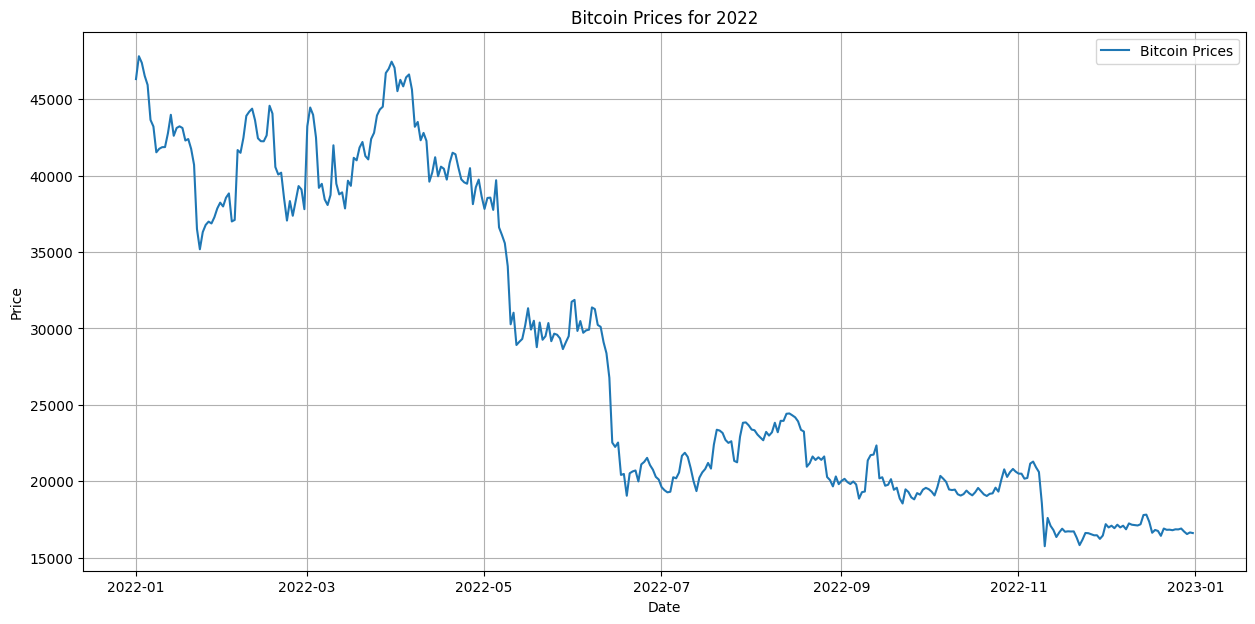

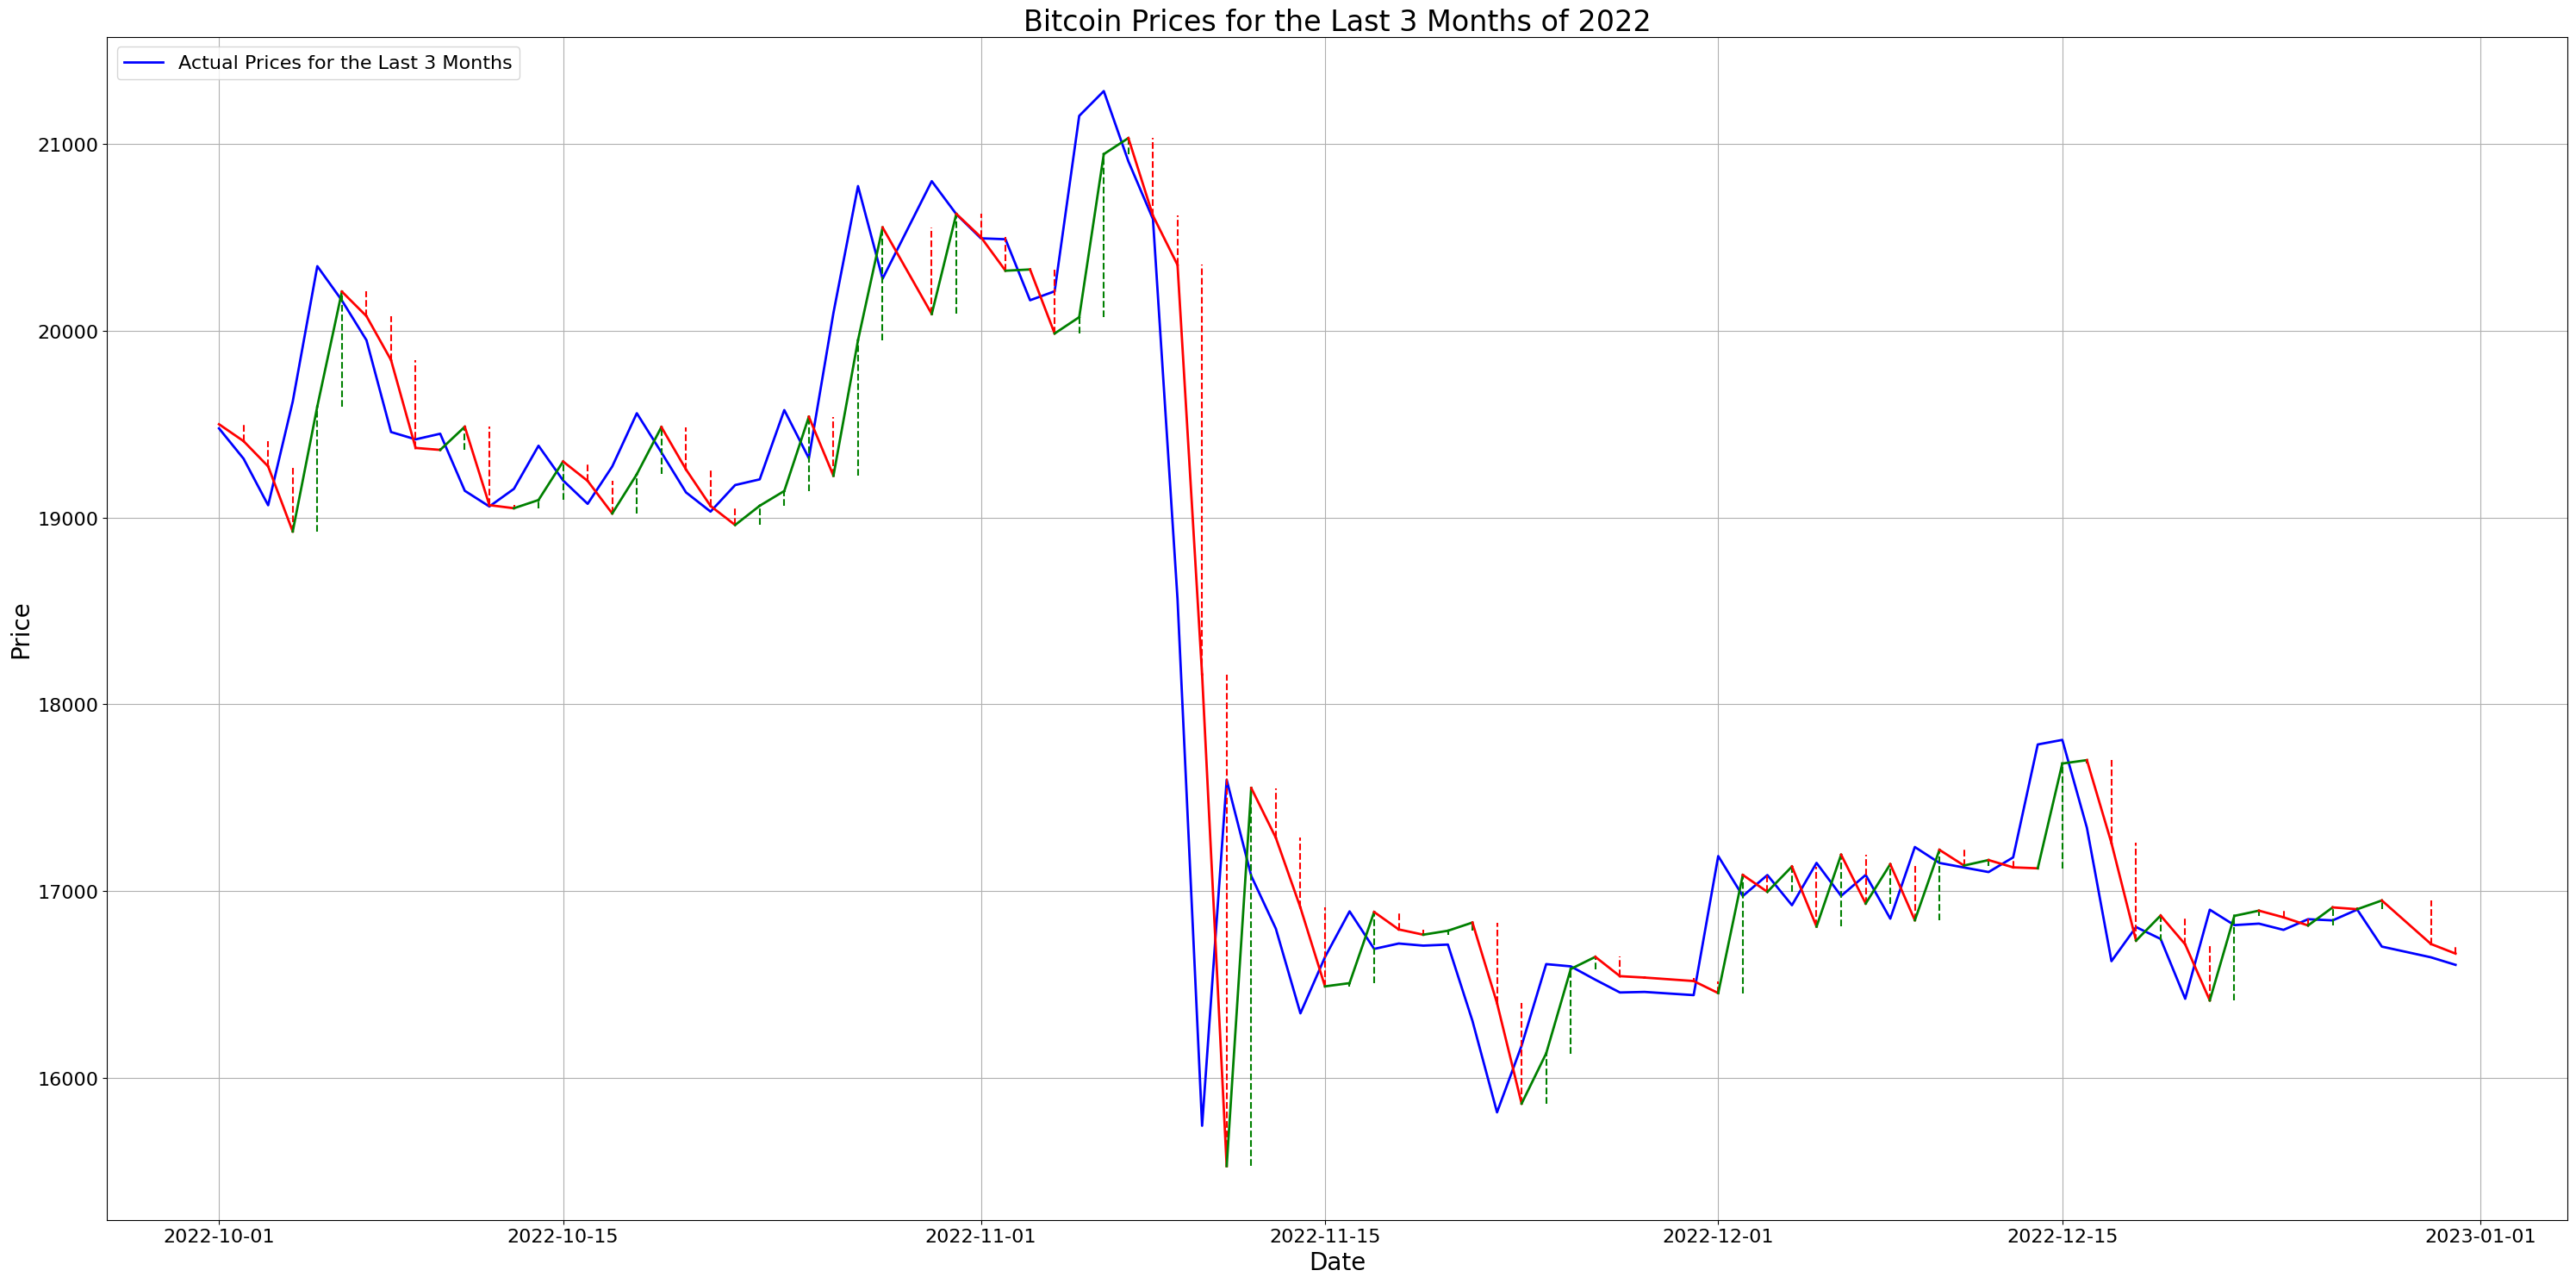

In [31]:
import os
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import numpy as np

def load_data(directory, parse_date_col=True):
    files = sorted(os.listdir(directory))
    data = [pd.read_csv(os.path.join(directory, file), parse_dates=['Date'] if parse_date_col else None, dayfirst=True) for file in files if file.endswith('.csv')]
    return data

# Load the data
price_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Bitcoin 2022\\Monthly Data'
price_data = load_data(price_directory)

# Concatenate all data and sort by date
all_data = pd.concat(price_data)
all_data = all_data.sort_values(by='Date')

plt.figure(figsize=(15,7))
plt.plot(pd.to_datetime(all_data['Date'], dayfirst=True), all_data['Price'], label='Bitcoin Prices')
plt.title('Bitcoin Prices for 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Separate code for your sentiment analysis and prediction
sentiment_directory = 'C:\\Users\\Rober\\Personal Projects\\STOCK MONEY\\Classfied with sentiment scores\\2022_data'
sentiment_data = load_data(sentiment_directory, parse_date_col=False)

train_price_data = pd.concat(price_data[:9])
test_price_data = pd.concat(price_data[9:])
train_sentiment_data = pd.concat(sentiment_data[:9])
test_sentiment_data = pd.concat(sentiment_data[9:])

train_price_data['Day'] = train_price_data['Date'].dt.day
test_price_data['Day'] = test_price_data['Date'].dt.day
train_sentiment_data['Day'] = pd.to_datetime(train_sentiment_data['Day'], format='%d').dt.day
test_sentiment_data['Day'] = pd.to_datetime(test_sentiment_data['Day'], format='%d').dt.day
train_data = pd.merge(train_price_data, train_sentiment_data, on='Day', suffixes=('_price', '_sentiment'))
test_data = pd.merge(test_price_data, test_sentiment_data, on='Day', suffixes=('_price', '_sentiment'))
# Deduplicate dates and take average sentiment
# This replaces the step where you calculated 'AvgSentiment'
train_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)
test_data.rename(columns={'Average Sentiment Score': 'AvgSentiment'}, inplace=True)
train_data = train_data.groupby('Date').agg({'Price': 'first', 'AvgSentiment': 'mean', 'MarketCap': 'first', 'Volume': 'first'}).reset_index()
test_data = test_data.groupby('Date').agg({'Price': 'first', 'AvgSentiment': 'mean', 'MarketCap': 'first', 'Volume': 'first'}).reset_index()
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

# Convert index to period index with daily frequency
train_data.index = train_data.index.to_period('D')
test_data.index = test_data.index.to_period('D')
# Continue with VAR modelling
model_data = train_data[['MarketCap', 'Price', 'Volume']]  # Select necessary columns Set Date as index and select necessary columns
model = VAR(model_data)
model_fit = model.fit()

predicted_prices_actual_based = []

# Loop through the test data, extending the training data by one observation at a time
for i in range(len(test_data)):
    # Extend the training data to include data up to the current test day
    extended_train_data = pd.concat([train_data, test_data.iloc[:i]])
    
    # Select necessary columns for VAR model
    model_data = extended_train_data[['MarketCap', 'Price', 'Volume']]
    
    # Retrain the VAR model on the extended training data
    model = VAR(model_data)
    model_fit = model.fit()
    
    # Make a one-step forecast for the next day
    forecast = model_fit.forecast(model_data.values, steps=1)
    
    # Extract the forecasted price and store it in the list
    predicted_price = forecast[0, 1]  # 1 is the index for 'Price' column
    predicted_prices_actual_based.append(predicted_price)

# Convert the list of predicted prices to a NumPy array for easier manipulation
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

plt.figure(figsize=(30, 15))  # Set figure size

# Plot actual prices
plt.plot(test_data_reset_index['Date'], test_data_reset_index['Price'], label='Actual Prices for the Last 3 Months', color='b', linestyle='-', linewidth=2)

# ... (rest of your code)

# Calculate the direction of predictions (up or down)
directions = np.sign(np.diff(predicted_prices_actual_based, prepend=predicted_prices_actual_based[0]))

# Plot predictions with colored line segments based on direction
for idx in range(1, len(predicted_prices_actual_based)):
    color = 'g' if directions[idx] >= 0 else 'r'
    plt.plot(test_data_reset_index['Date'].iloc[idx-1:idx+1], predicted_prices_actual_based[idx-1:idx+1], color=color, linestyle='-', linewidth=2)
    plt.vlines(test_data_reset_index['Date'].iloc[idx], min(predicted_prices_actual_based[idx-1:idx+1]), max(predicted_prices_actual_based[idx-1:idx+1]), color=color, linestyle='dashed', linewidth=1.5)

plt.title('Bitcoin Prices for the Last 3 Months of 2022', fontsize=24)  # Set title font size
plt.xlabel('Date', fontsize=20)  # Set x-axis label font size
plt.ylabel('Price', fontsize=20)  # Set y-axis label font size
plt.legend(loc="upper left", fontsize=16)  # Set legend font size
plt.xticks(fontsize=16)  # Set x-axis ticks font size
plt.yticks(fontsize=16)  # Set y-axis ticks font size
plt.grid(True)
plt.tight_layout()

#plt.savefig('bitcoin_prices.jpg', format='jpg', dpi=300)  # Save figure as JPG file

plt.show()


Mean Percentage Error: 1.71%
Trend Similarity: 44.32%


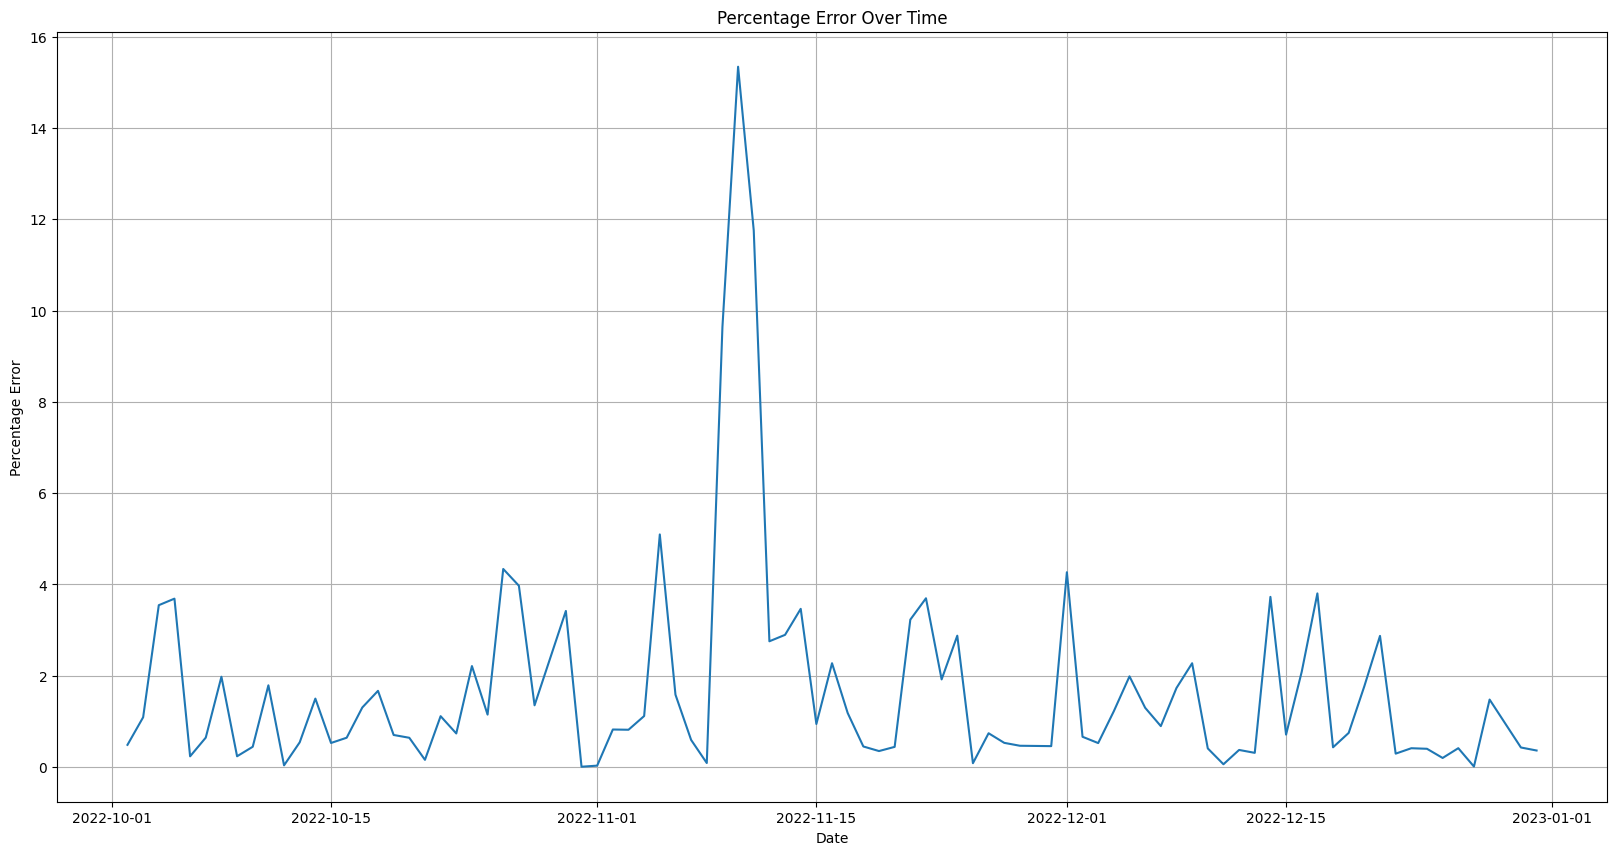

In [34]:
import numpy as np

# Assuming actual_prices is a numpy array of your actual prices
actual_prices = test_data['Price'].values

# Your predicted prices
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

# Calculate percentage error
percentage_error = np.abs((actual_prices - predicted_prices_actual_based) / actual_prices) * 100

# Calculate the mean percentage error
mean_percentage_error = np.mean(percentage_error)

# Print mean percentage error
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')

# Calculate trend for actual and predicted prices
actual_trend = np.sign(np.diff(actual_prices))
predicted_trend = np.sign(np.diff(predicted_prices_actual_based))

# Calculate trend similarity
trend_similarity = np.sum(actual_trend == predicted_trend) / len(actual_trend) * 100

# Print trend similarity
print(f'Trend Similarity: {trend_similarity:.2f}%')

# If you want to visualize the percentage error
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(test_data_reset_index['Date'][1:], percentage_error[1:])  # Starting from index 1 to match the length of actual_trend and predicted_trend
plt.title('Percentage Error Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Error')
plt.grid(True)
plt.show()


In [37]:
import numpy as np
import pandas as pd

# Assuming actual_prices and predicted_prices_actual_based are your arrays of actual and predicted prices
actual_prices = test_data['Price'].values
predicted_prices_actual_based = np.array(predicted_prices_actual_based)

# Compute the daily price changes
actual_daily_changes = np.diff(actual_prices)
predicted_daily_changes = np.diff(predicted_prices_actual_based)

# Determine the direction of the price changes (1 for up, -1 for down, 0 for no change)
actual_trend = np.sign(actual_daily_changes)
predicted_trend = np.sign(predicted_daily_changes)

# Compare the trends to see how often they match
trend_matches = (actual_trend == predicted_trend)

# Calculate the trend similarity as a percentage
trend_similarity = (np.sum(trend_matches) / len(trend_matches)) * 100

# Print the trend similarity
print(f'Daily Trend Similarity: {trend_similarity:.2f}%')

# If desired, you can create a DataFrame to see the trends and matches visually
trend_df = pd.DataFrame({
    'Date': test_data_reset_index['Date'].iloc[1:].values,  # excluding the first date as diff() reduces the array length by 1
    'Actual Trend': actual_trend,
    'Predicted Trend': predicted_trend,
    'Trend Match': trend_matches
})

print(trend_df)
trend_df['Trend Match'].value_counts()

Daily Trend Similarity: 44.32%
         Date  Actual Trend  Predicted Trend  Trend Match
0  2022-10-02          -1.0             -1.0         True
1  2022-10-03          -1.0             -1.0         True
2  2022-10-04           1.0             -1.0        False
3  2022-10-05           1.0              1.0         True
4  2022-10-06          -1.0              1.0        False
..        ...           ...              ...          ...
83 2022-12-26          -1.0              1.0        False
84 2022-12-27           1.0             -1.0        False
85 2022-12-28          -1.0              1.0        False
86 2022-12-30          -1.0             -1.0         True
87 2022-12-31          -1.0             -1.0         True

[88 rows x 4 columns]


False    49
True     39
Name: Trend Match, dtype: int64

In [41]:
import numpy as np
import pandas as pd

# Assume `test_data` is your DataFrame containing the daily prices and dates
# And `predicted_prices_actual_based` is your array of predicted prices

# Create DataFrames for the actual and predicted prices
actual_prices_df = pd.DataFrame({'Date': test_data_reset_index['Date'], 'Actual Prices': test_data_reset_index['Price']})
predicted_prices_df = pd.DataFrame({'Date': test_data_reset_index['Date'], 'Predicted Prices': predicted_prices_actual_based})

# Set the date column as the index
actual_prices_df.set_index('Date', inplace=True)
predicted_prices_df.set_index('Date', inplace=True)

# Resample the data to weekly, taking the mean of each week's prices
actual_weekly_prices = actual_prices_df.resample('W').mean()
predicted_weekly_prices = predicted_prices_df.resample('W').mean()

# Compute the week-to-week changes
actual_weekly_changes = np.diff(actual_weekly_prices.values.flatten())
predicted_weekly_changes = np.diff(predicted_weekly_prices.values.flatten())

# Determine the direction of the changes (1 for up, -1 for down, 0 for no change)
actual_weekly_trend = np.sign(actual_weekly_changes)
predicted_weekly_trend = np.sign(predicted_weekly_changes)

# Compare the trends to see how often they match
weekly_trend_matches = (actual_weekly_trend == predicted_weekly_trend)

# Calculate the trend similarity as a percentage
weekly_trend_similarity = (np.sum(weekly_trend_matches) / len(weekly_trend_matches)) * 100

# Print the trend similarity
print(f'Weekly Trend Similarity: {weekly_trend_similarity:.2f}%')

weekly_trend_df = pd.DataFrame({
    'Week Ending': actual_weekly_prices.index[1:],  # excluding the first date as diff() reduces the array length by 1
    'Actual Weekly Trend': actual_weekly_trend,
    'Predicted Weekly Trend': predicted_weekly_trend,
    'Trend Match': weekly_trend_matches
}, index=range(len(actual_weekly_trend)))  # <-- Add this line to create a new index

print(weekly_trend_df)

Weekly Trend Similarity: 84.62%
   Week Ending  Actual Weekly Trend  Predicted Weekly Trend  Trend Match
0   2022-10-09                  1.0                     1.0         True
1   2022-10-16                 -1.0                    -1.0         True
2   2022-10-23                  1.0                    -1.0        False
3   2022-10-30                  1.0                     1.0         True
4   2022-11-06                  1.0                     1.0         True
5   2022-11-13                 -1.0                    -1.0         True
6   2022-11-20                 -1.0                    -1.0         True
7   2022-11-27                 -1.0                    -1.0         True
8   2022-12-04                  1.0                     1.0         True
9   2022-12-11                  1.0                     1.0         True
10  2022-12-18                  1.0                     1.0         True
11  2022-12-25                 -1.0                    -1.0         True
12  2023-01-01     